In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 152)
pd.set_option('display.max_rows', 152)

In [10]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',)
df.drop('member_id',axis=1,inplace=True)
df = df[df['issue_d'].notna()]
df = df[df.loan_status!='Current']
df.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
164901,57418310,10200.0,10200.0,10200.0,36 months,12.29,340.21,C,C1,biller,3 years,RENT,33000.0,Source Verified,Aug-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,930xx,CA,25.35,0.0,Jan-2003,705.0,709.0,0.0,NaN,NaN,19.0,0.0,11748.0,61.2,32.0,w,0.0,0.0,12235.735497,12235.74,10200.00,2035.74,0.0,0.00,0.0000,Aug-2018,679.21,NaN,Jan-2019,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,25463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19200.0,NaN,NaN,NaN,4.0,1591.0,2516.0,61.9,0.0,0.0,109.0,151.0,3.0,2.0,0.0,40.0,NaN,2.0,NaN,1.0,3.0,11.0,3.0,8.0,8.0,16.0,24.0,11.0,19.0,0.0,0.0,0.0,3.0,93.7,66.7,0.0,0.0,33412.0,25463.0,6600.0,14212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
192103,56562874,15000.0,15000.0,15000.0,60 months,18.55,385.41,E,E2,Pharmacy Technician,9 years,OWN,50000.0,Verified,Jul-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,752xx,TX,26.04,2.0,Aug-2005,665.0,669.0,0.0,12.0,NaN,9.0,0.0,6288.0,49.1,18.0,w,0.0,0.0,2019.430000,2019.43,467.76,673.01,0.0,878.66,158.1588,Nov-2015,385.41,NaN,Oct-2017,509.0,505.0,0.0,12.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,31294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12800.0,NaN,NaN,NaN,3.0,3477.0,1408.0,79.9,0.0,0.0,119.0,112.0,15.0,1.0,0.0,15.0,NaN,9.0,NaN,2.0,2.0,3.0,3.0,7.0,7.0,5.0,11.0,3.0,9.0,0.0,0.0,2.0,2.0,88.9,66.7,0.0,0.0,60444.0,31294.0,7000.0,47644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df.isnull().sum()

id                                                  0
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      133722
emp_length                                     117549
home_ownership                                      0
annual_inc                                          3
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                                                 0
desc                        

In [11]:
df['year']=df.issue_d.map(lambda x:int(x.split('-')[-1]))
df.sample(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
1289170,14308144,15000.0,15000.0,15000.0,60 months,15.61,361.67,C,C5,Electronic Technician,10+ years,MORTGAGE,55000.0,Source Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,130xx,NY,7.31,0.0,Nov-2008,700.0,704.0,0.0,NaN,NaN,6.0,0.0,3717.0,36.4,8.0,w,0.0,0.0,17797.710000,17797.71,15000.0,2797.71,0.0,0.0,0.0,Jul-2015,12734.33,NaN,Mar-2019,799.0,795.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,160914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,5.0,26819.0,6483.0,36.4,0.0,0.0,65.0,29.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,0.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,171521.0,12904.0,10200.0,9228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014
1092000,69017353,28000.0,28000.0,28000.0,60 months,7.91,566.54,A,A5,VP Branch Manager,10+ years,MORTGAGE,180000.0,Source Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,967xx,HI,5.19,0.0,Mar-1996,700.0,704.0,0.0,NaN,NaN,7.0,0.0,26726.0,90.6,37.0,w,0.0,0.0,31493.738886,31493.74,28000.0,3493.74,0.0,0.0,0.0,Nov-2017,19608.70,NaN,Mar-2019,724.0,720.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,912161.0,0.0,0.0,0.0,0.0,25.0,0.0,NaN,0.0,2.0,18106.0,91.0,29500.0,1.0,9.0,3.0,3.0,182432.0,1395.0,94.3,0.0,0.0,155.0,238.0,17.0,7.0,6.0,130.0,NaN,7.0,NaN,0.0,2.0,3.0,3.0,13.0,11.0,6.0,20.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,922000.0,26726.0,24300.0,0

In [5]:
L = ["Charged Off","Fully Paid"]
temp = df[ ( (df.loan_status==L[0] ) | (df.loan_status==L[1]) )  ]

#temp.loan_status = temp.loan_status.map({'Charged Off':0,'Fully Paid':1})
temp.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
1222456,21310548,12000.0,12000.0,12000.0,36 months,24.50,473.96,F,F3,EMT,2 years,RENT,40000.0,Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,076xx,NJ,26.16,0.0,Feb-1991,675.0,679.0,0.0,45.0,NaN,10.0,0.0,8582.0,63.6,21.0,w,0.0,0.0,14402.450000,14402.45,12000.00,2402.45,0.00,0.0,0.0,Jun-2015,10610.77,NaN,Jun-2015,609.0,605.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,35849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN,9.0,3983.0,1344.0,85.9,0.0,0.0,39.0,281.0,8.0,8.0,0.0,8.0,45.0,9.0,45.0,0.0,3.0,5.0,5.0,8.0,4.0,8.0,17.0,5.0,10.0,0.0,0.0,0.0,5.0,95.2,75.0,0.0,0.0,46181.0,35849.0,9500.0,32681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014
1216952,24043499,5000.0,5000.0,5000.0,36 months,10.15,161.69,B,B2,Teacher,10+ years,MORTGAGE,75000.0,Not Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,300xx,GA,24.35,0.0,Apr-1988,695.0,699.0,0.0,39.0,109.0,14.0,1.0,10777.0,63.4,32.0,f,0.0,0.0,5523.440000,5523.44,5000.00,523.44,0.00,0.0,0.0,Oct-2015,3421.47,NaN,Jan-2017,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,279452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17000.0,NaN,NaN,NaN,3.0,23288.0,4423.0,70.9,0.0,0.0,165.0,315.0,36.0,12.0,3.0,36.0,39.0,12.0,39.0,0.0,3.0,3.0,4.0,6.0,19.0,6.0,9.0,3.0,14.0,0.0,0.0,0.0,1.0,93.7,66.7,1.0,0.0,311129.0,63002.0,15200.0,66627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
temp['work_year'] = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True) 

<ipython-input-6-e10632bbfdc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['work_year'] = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True)


In [7]:
#temp = temp.dropna()
temp.work_year = pd.to_numeric(temp.work_year)

C:\python\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
temp.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,work_year
1222456,21310548,12000.0,12000.0,12000.0,36 months,24.50,473.96,F,F3,EMT,2 years,RENT,40000.0,Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,076xx,NJ,26.16,0.0,Feb-1991,675.0,679.0,0.0,45.0,NaN,10.0,0.0,8582.0,63.6,21.0,w,0.0,0.0,14402.450000,14402.45,12000.00,2402.45,0.00,0.0,0.0,Jun-2015,10610.77,NaN,Jun-2015,609.0,605.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,35849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN,9.0,3983.0,1344.0,85.9,0.0,0.0,39.0,281.0,8.0,8.0,0.0,8.0,45.0,9.0,45.0,0.0,3.0,5.0,5.0,8.0,4.0,8.0,17.0,5.0,10.0,0.0,0.0,0.0,5.0,95.2,75.0,0.0,0.0,46181.0,35849.0,9500.0,32681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,2.0
1216952,24043499,5000.0,5000.0,5000.0,36 months,10.15,161.69,B,B2,Teacher,10+ years,MORTGAGE,75000.0,Not Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,300xx,GA,24.35,0.0,Apr-1988,695.0,699.0,0.0,39.0,109.0,14.0,1.0,10777.0,63.4,32.0,f,0.0,0.0,5523.440000,5523.44,5000.00,523.44,0.00,0.0,0.0,Oct-2015,3421.47,NaN,Jan-2017,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,279452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17000.0,NaN,NaN,NaN,3.0,23288.0,4423.0,70.9,0.0,0.0,165.0,315.0,36.0,12.0,3.0,36.0,39.0,12.0,39.0,0.0,3.0,3.0,4.0,6.0,19.0,6.0,9.0,3.0,14.0,0.0,0.0,0.0,1.0,93.7,66.7,1.0,0.0,311129.0,63002.0,15200.0,66627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Text(0.5, 1.0, 'Frequency of loan per class')

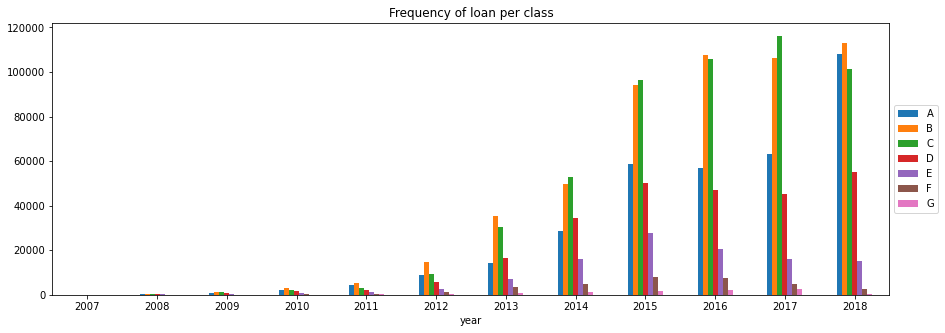

In [9]:
plt.rcParams["figure.figsize"] = [15, 5]
g = df.groupby(['year'])['grade'].value_counts().unstack(1).plot(kind='bar',)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=0)
plt.title('Frequency of loan per class')



In [10]:

df.groupby(['year'])['grade'].value_counts().unstack(1)

grade,A,B,C,D,E,F,G
year,,,,,,,
2007,61,81,107,76,81,38,26
2008,249,486,474,346,219,89,76
2009,978,1168,1084,659,255,83,43
2010,2242,2945,2184,1496,781,252,110
2011,4548,5224,3165,2230,1409,573,171
2012,8763,14838,9464,5899,2524,1075,197
2013,14211,35391,30611,16340,7212,3535,705
2014,28816,49637,53032,34409,16181,4933,1318
2015,58774,94101,96599,50005,27913,7892,1743


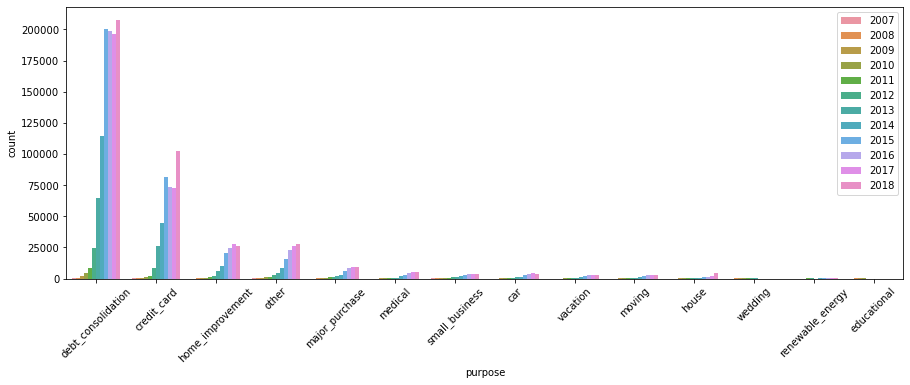

In [11]:
#temp = df[df.purpose=='Charged Off']
#chart = sns.countplot(x='purpose',data=temp,hue='year',order = temp.purpose.value_counts(normalize=True).index)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

chart = sns.countplot(x='purpose',data=df,hue='year',order = df.purpose.value_counts().index,)#,color='loan_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#temp = df[df.purpose=='Charged Off']
#chart = sns.countplot(x='purpose',data=temp,hue='year',order = temp.purpose.value_counts(normalize=True).index)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.legend(loc='upper right')

In [12]:
set(df.loan_status)

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)'}

In [13]:
# try to display the count of charged off in the plot

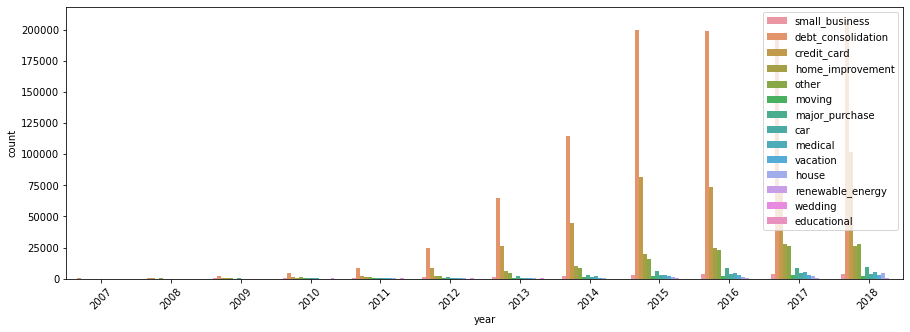

In [14]:
chart = sns.countplot(x='year',data=df,hue='purpose')#,color='loan_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.legend(loc='upper right')

In [15]:
# for each year percentage 
# eg 2007 75% of the loan were car loan and 25% credit card

In [16]:
df.year.dtypes

dtype('int64')

In [17]:
#  There are different factors that influence on the level of risk of the loan.
# 

In [18]:
df.loan_status

1222456         Fully Paid
1089513            Current
1410554    In Grace Period
1216952         Fully Paid
13571           Fully Paid
                ...       
613979             Current
1883944         Fully Paid
330252          Fully Paid
1934127         Fully Paid
53469          Charged Off
Name: loan_status, Length: 1808534, dtype: object

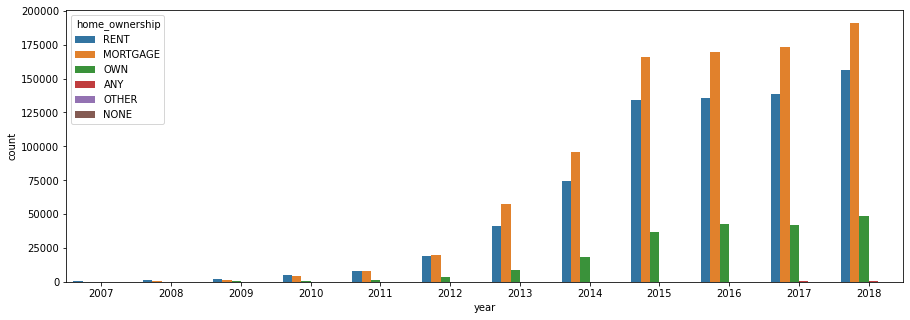

In [19]:
sns.countplot(x='year',hue='home_ownership',data=df)

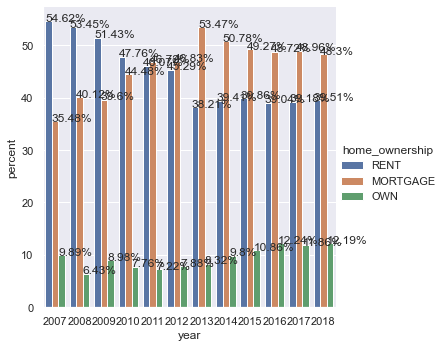

In [20]:
L = ["MORTGAGE","RENT","OWN"]
temp = df[(df.home_ownership==L[0] )| ( df.home_ownership==L[1]) | (df.home_ownership==L[2] ) ]

sns.set(rc={'figure.figsize':(25.7,18.27)})

x,y = 'year', 'home_ownership'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



In [21]:
df.year

1222456    2014
1089513    2016
1410554    2018
1216952    2014
13571      2015
           ... 
613979     2017
1883944    2013
330252     2015
1934127    2012
53469      2015
Name: year, Length: 1808534, dtype: int64

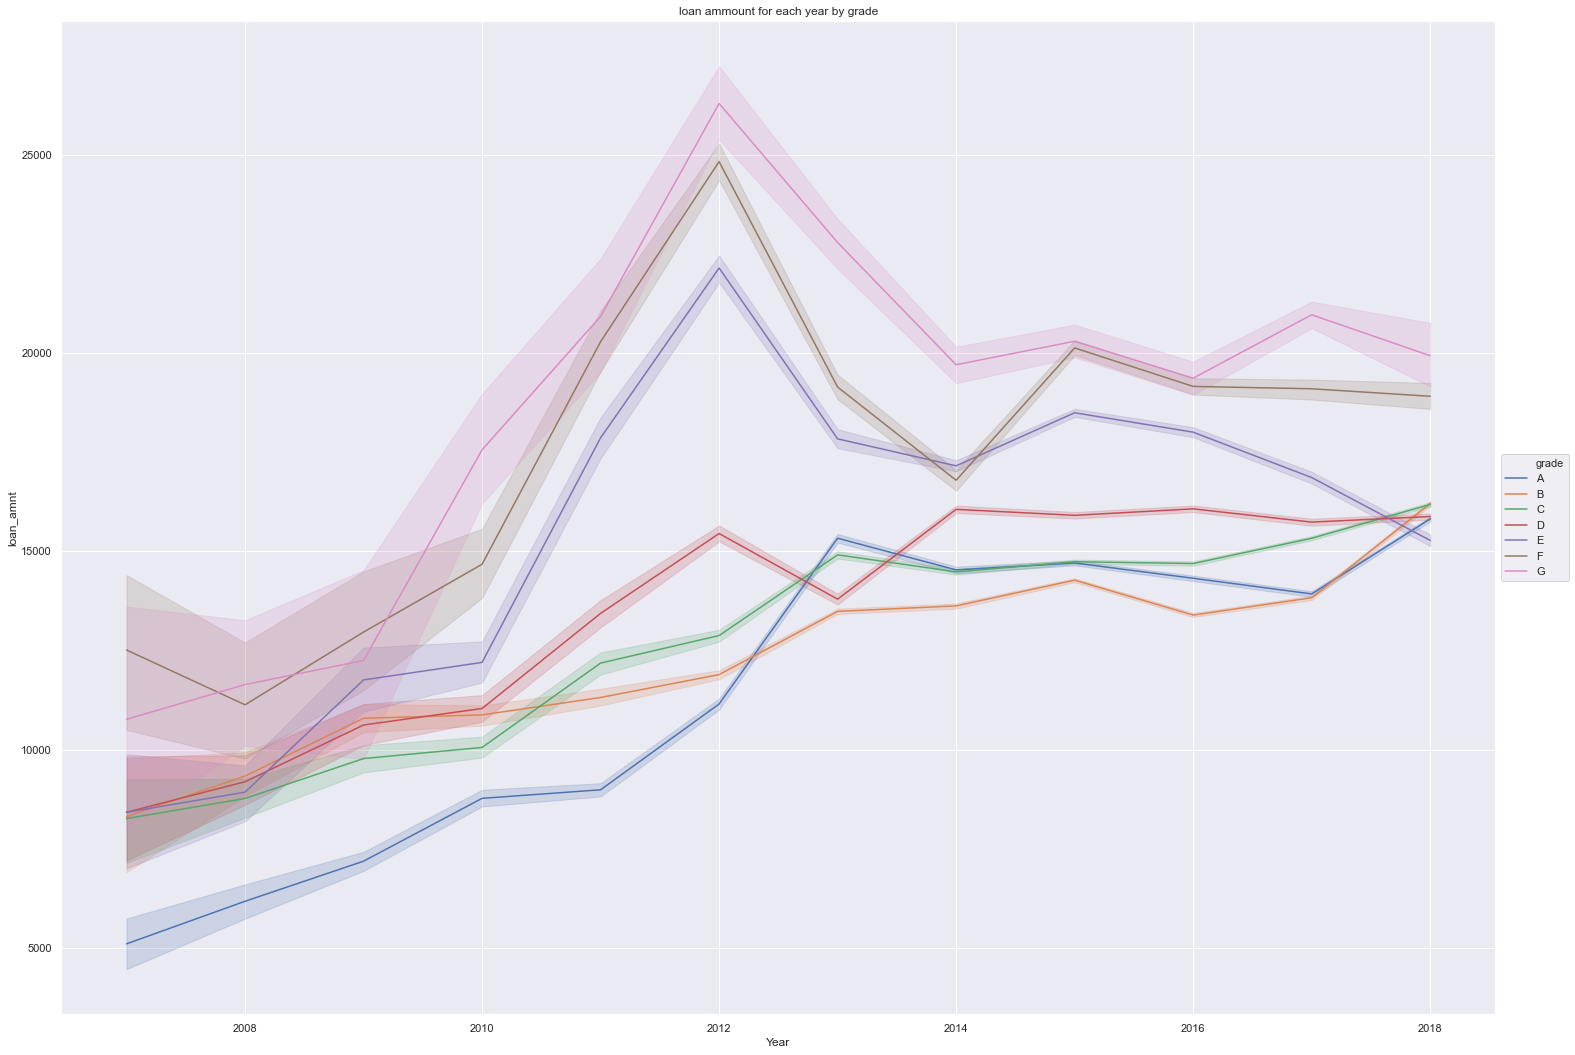

In [22]:
g = sns.lineplot(x='year',y='loan_amnt',hue='grade',data=df,hue_order=['A','B','C','D','E','F','G'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.title('loan ammount for each year by grade')
plt.show()


In [23]:
df.annual_inc.describe()

count    1.808531e+06
mean     7.799985e+04
std      1.195560e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [24]:
temp = df.copy()
temp['status'] = df.annual_inc.copy()

temp['status'] = np.where(temp['annual_inc'].between(0,46500), 'first_q',temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(46500,66000), 'second_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(66000,93000), 'third_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(93000,9999999999), 'fourth_q', temp['status'])

temp[['annual_inc','status']]

,annual_inc,status
1222456,40000.0,first_q
1089513,152000.0,fourth_q
1410554,80000.0,third_q
1216952,75000.0,third_q
13571,22000.0,first_q
...,...,...
613979,45000.0,first_q
1883944,42000.0,first_q
330252,100000.0,fourth_q
1934127,30720.0,first_q


In [25]:
temp.status.value_counts()

second_q    466564
first_q     456971
fourth_q    455295
third_q     429701
nan              3
Name: status, dtype: int64

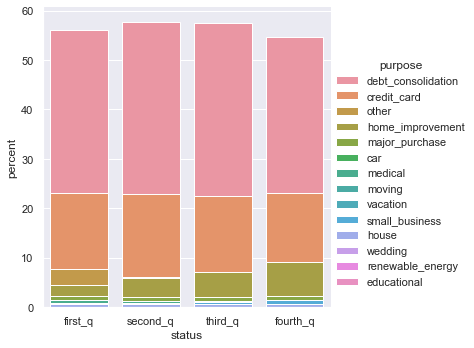

In [26]:
# not important
y,x= 'purpose', 'status'
temp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=["first_q","second_q","third_q","fourth_q"],dodge=False)


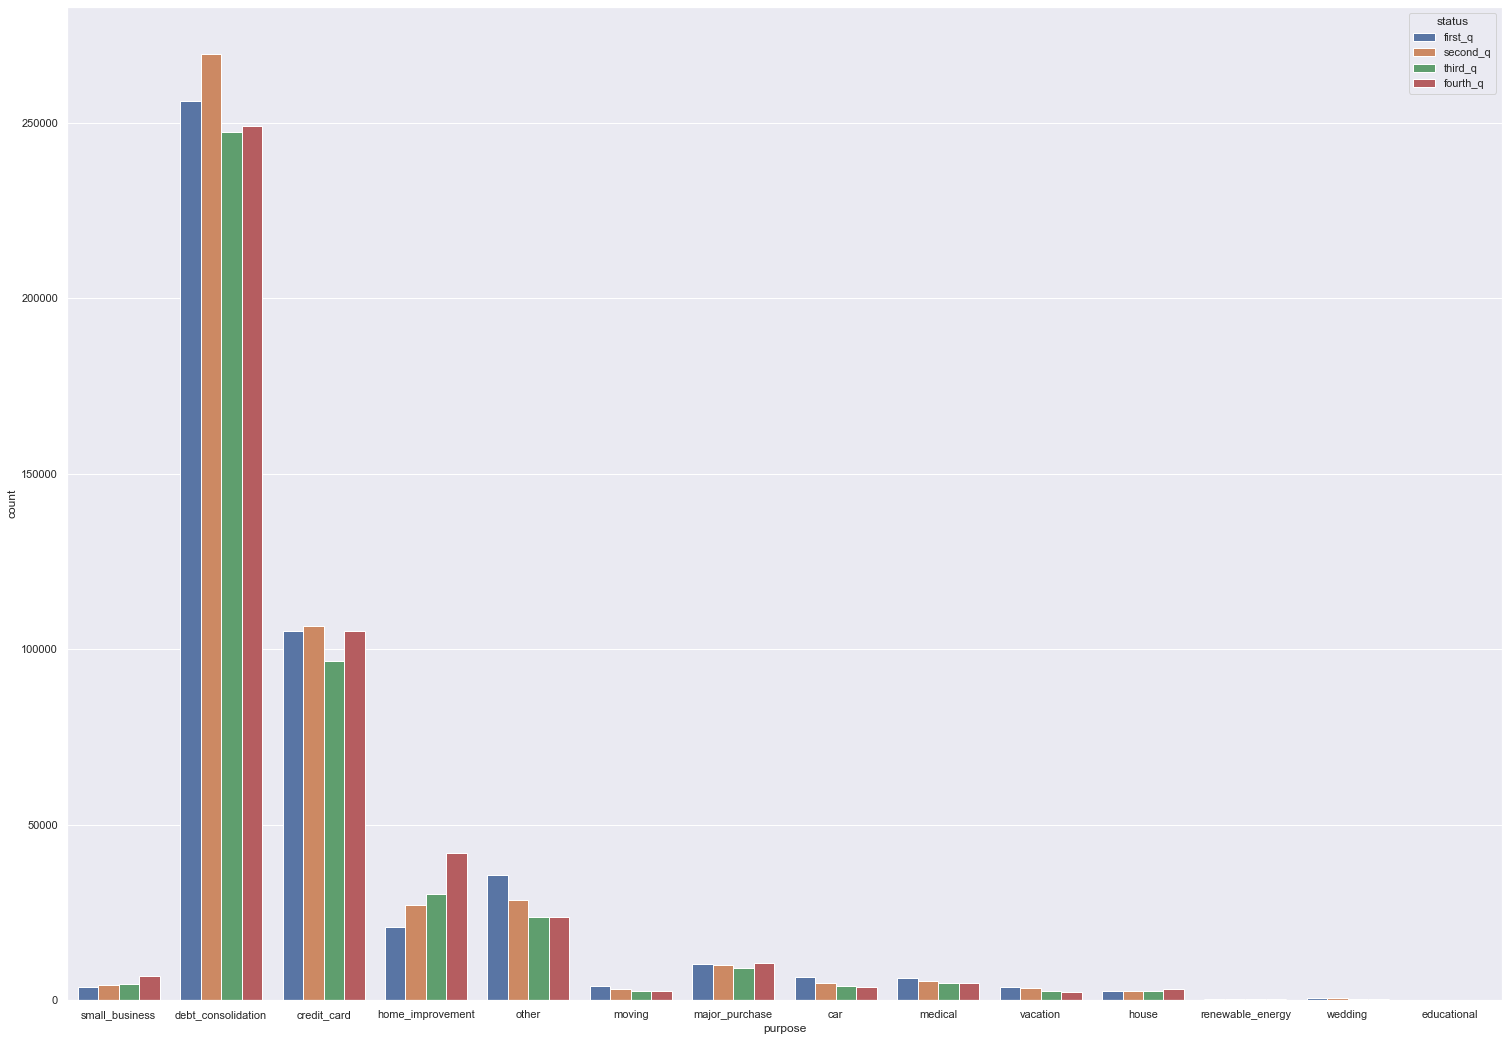

In [27]:
sns.countplot(x='purpose',hue='status',data=temp,hue_order=["first_q","second_q","third_q","fourth_q"])

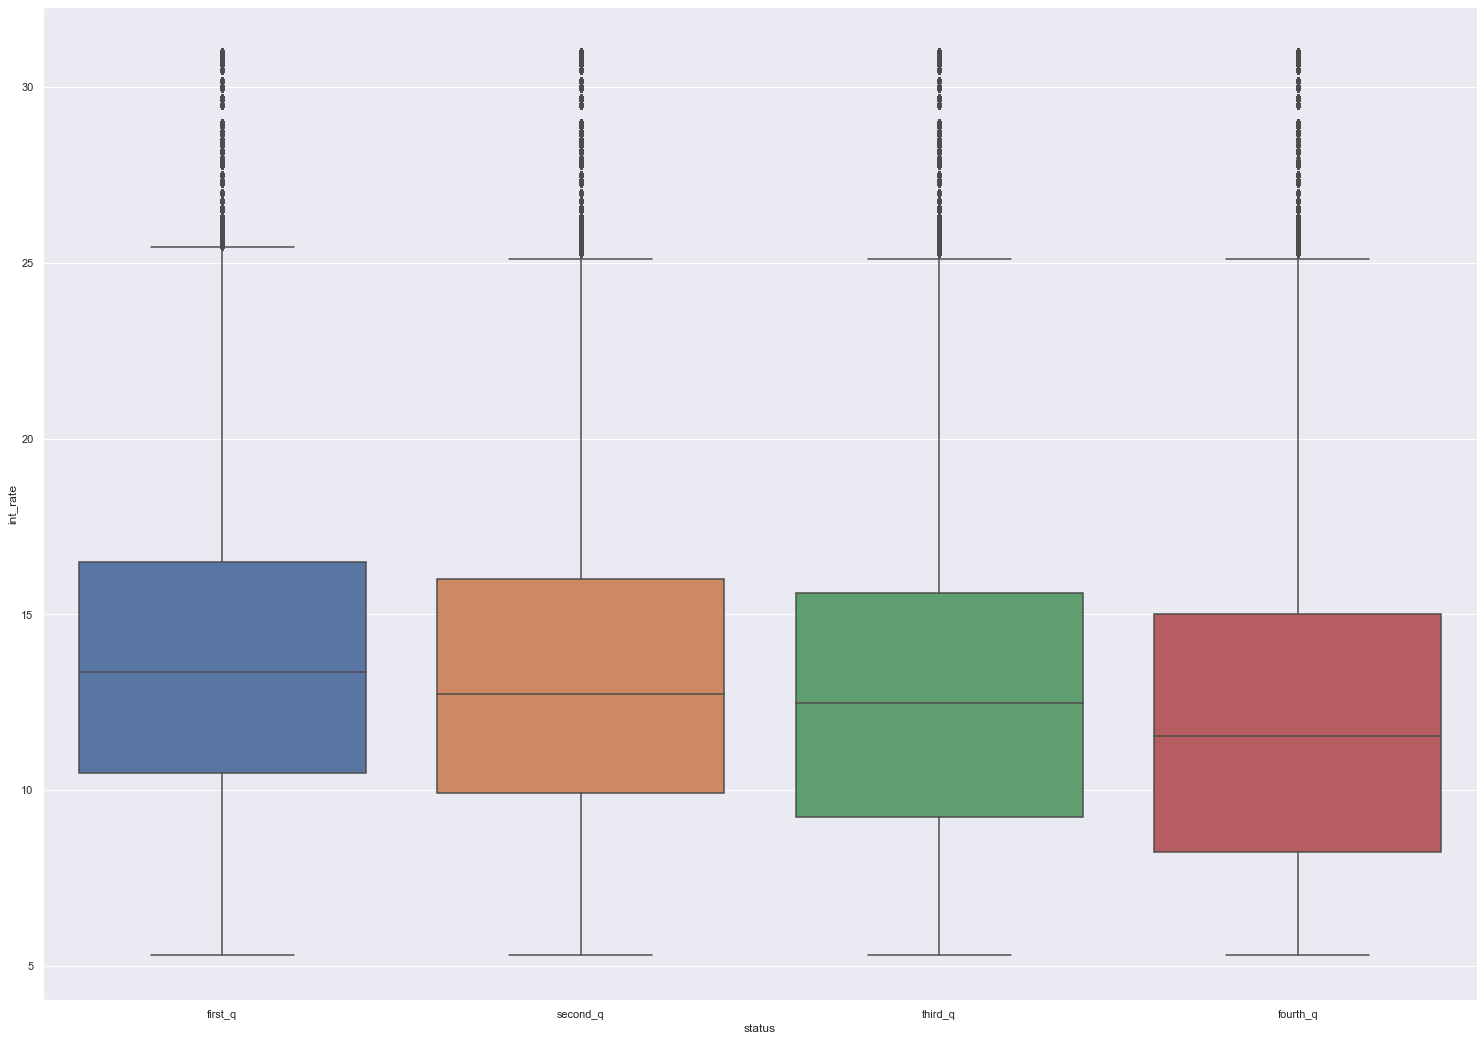

In [28]:
sns.boxplot(x='status',y='int_rate',data=temp,order=["first_q","second_q","third_q","fourth_q"])

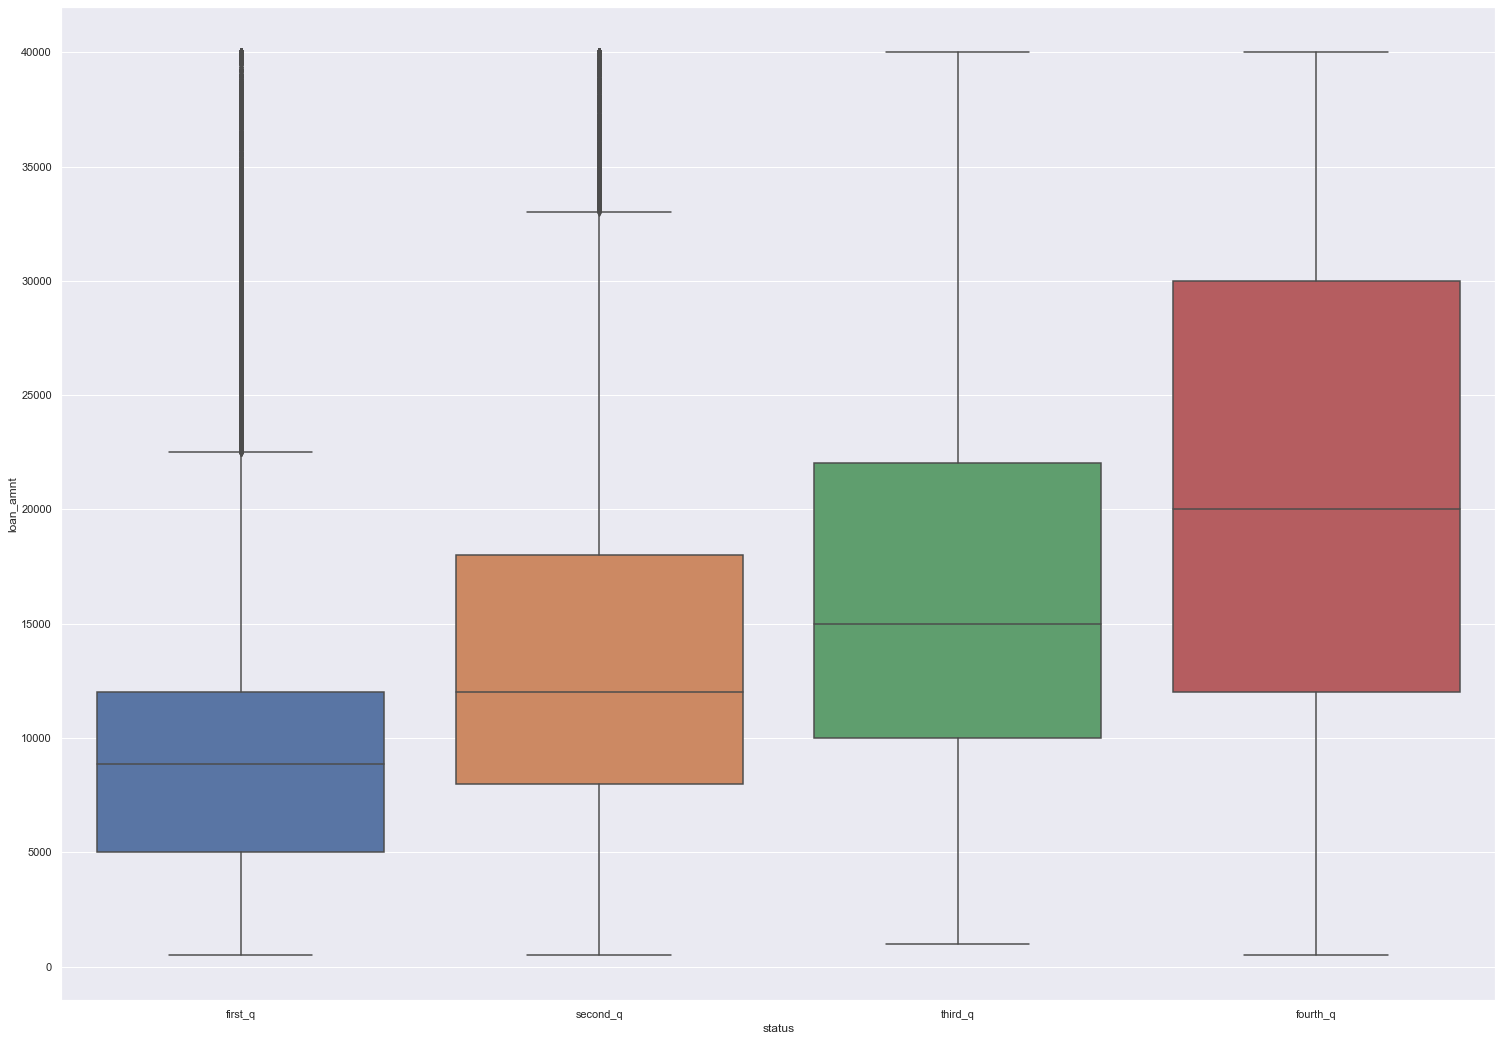

In [29]:
# not import
sns.boxplot(x='status',y='loan_amnt',data=temp,order=["first_q","second_q","third_q","fourth_q"])

In [30]:
import re
#re.sub("\D", "", temp.emp_length)
#  re.sub("[^0-9]", "", lambda a:temp.emp_length)
temp.emp_length = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True) 
ddd = temp[["emp_length",'status']].dropna()
ddd.head()

,emp_length,status
1222456,2,first_q
1089513,9,fourth_q
1410554,4,third_q
1216952,10,third_q
13571,2,first_q


In [31]:
ddd.shape
ddd.emp_length.value_counts(dropna=False)

10    598397
1     270957
2     162948
3     144208
5     111949
4     109277
6      82152
7      74123
8      73494
9      63480
Name: emp_length, dtype: int64

In [32]:
ddd.emp_length = ddd.emp_length.astype(float)

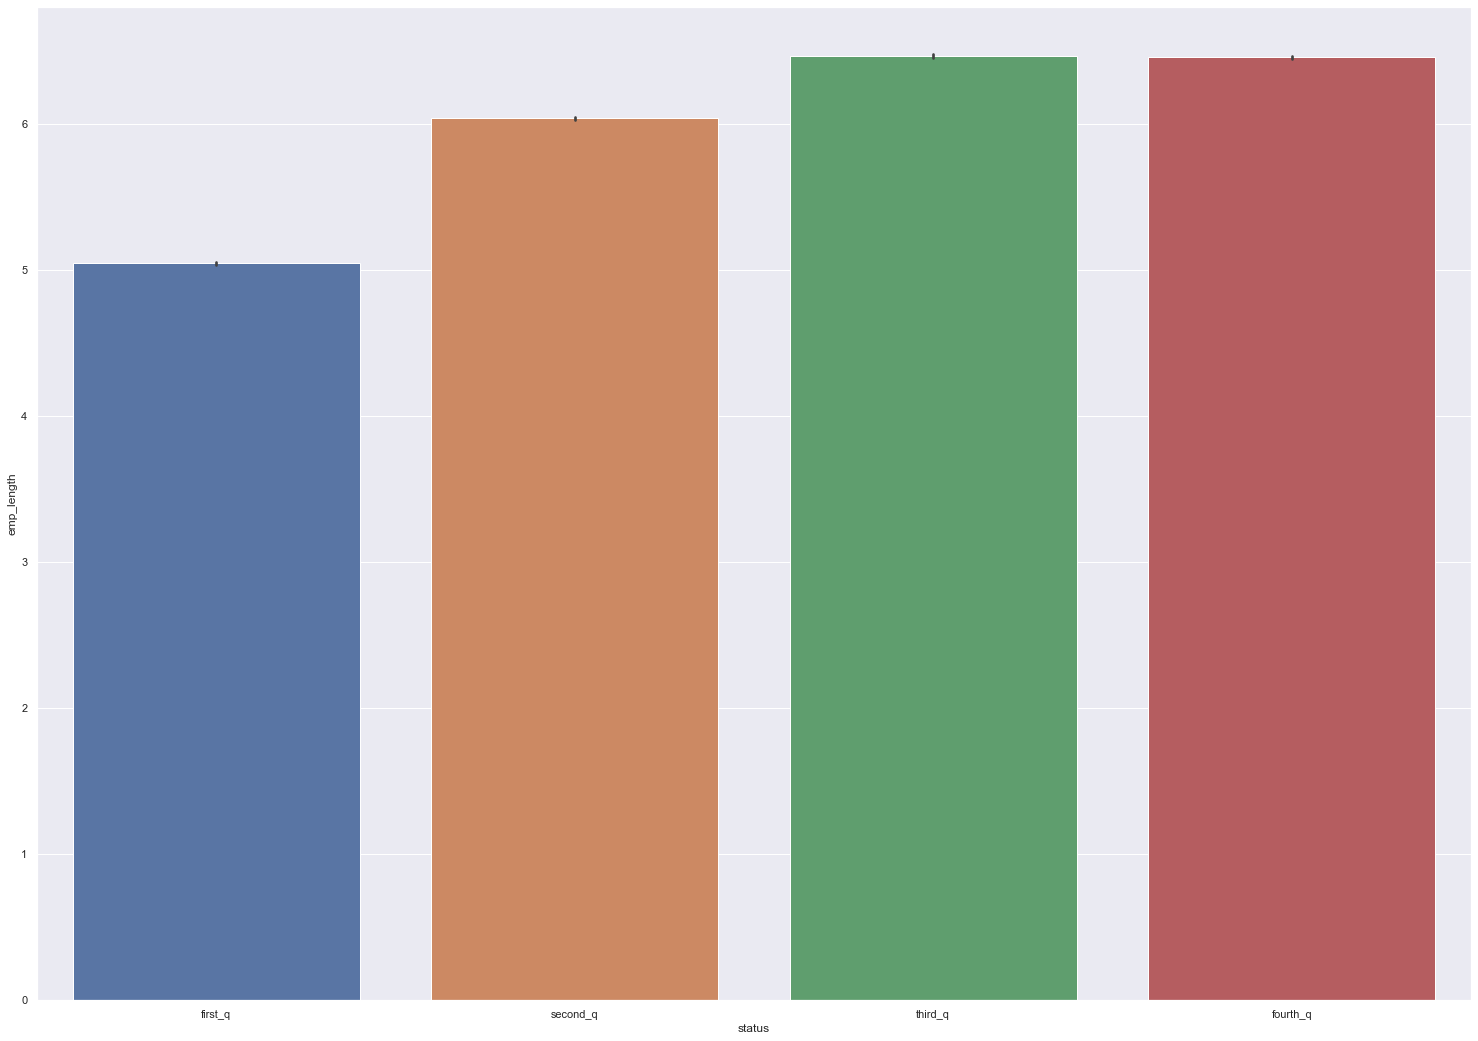

In [33]:
sns.barplot(x='status',y='emp_length',data=ddd,order=["first_q","second_q","third_q","fourth_q"])

In [34]:
set(df.loan_status)

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)'}

In [35]:
# begining

# temp = df[df.loan_status!='Current']
temp = df.copy()
print(temp.shape)
temp.head()

(1808534, 151)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
1222456,21310548,12000.0,12000.0,12000.0,36 months,24.50,473.96,F,F3,EMT,2 years,RENT,40000.0,Verified,Aug-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,076xx,NJ,26.16,0.0,Feb-1991,675.0,679.0,0.0,45.0,NaN,10.0,0.0,8582.0,63.6,21.0,w,0.00,0.00,14402.450000,14402.45,12000.00,2402.45,0.0,0.0,0.0,Jun-2015,10610.77,NaN,Jun-2015,609.0,605.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,35849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN,9.0,3983.0,1344.0,85.9,0.0,0.0,39.0,281.0,8.0,8.0,0.0,8.0,45.0,9.0,45.0,0.0,3.0,5.0,5.0,8.0,4.0,8.0,17.0,5.0,10.0,0.0,0.0,0.0,5.0,95.2,75.0,0.0,0.0,46181.0,35849.0,9500.0,32681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014
1089513,70180167,35000.0,35000.0,35000.0,60 months,17.27,874.93,D,D3,Quality Control Team Leader,9 years,MORTGAGE,152000.0,Source Verified,Jan-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,945xx,CA,20.39,0.0,Nov-1998,710.0,714.0,1.0,NaN,NaN,17.0,0.0,20199.0,70.6,32.0,w,16398.83,16398.83,33213.760000,33213.76,18601.17,14612.59,0.0,0.0,0.0,Mar-2019,874.93,Apr-2019,Mar-2019,664.0,660.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,85.0,497998.0,2.0,3.0,1.0,3.0,2.0,94753.0,64.0,1.0,2.0,3457.0,67.0,28600.0,1.0,7.0,4.0,6.0,29294.0,3608.0,80.0,0.0,0.0,143.0,206.0,12.0,2.0,2.0,12.0,NaN,3.0,NaN,0.0,8.0,13.0,8.0,10.0,13.0,13.0,17.0,13.0,17.0,0.0,0.0,0.0,3.0,100.0,62.5,0.0,0.0,534775.0,114952.0,18000.0

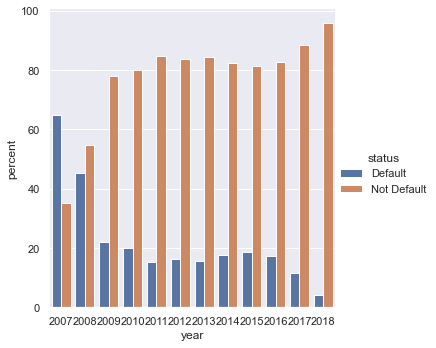

In [36]:
temp = df.copy()
L = ['Current','Fully Paid']
temp['status'] = temp.loan_status.apply(lambda x:'Not Default' if x in L  else 'Default' )
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

In [37]:
#Low-risk loans: Fully Paid
#High-risk Loans: Defaulted, Charged off, Settlement, In Grace Period, and Late Payments. 

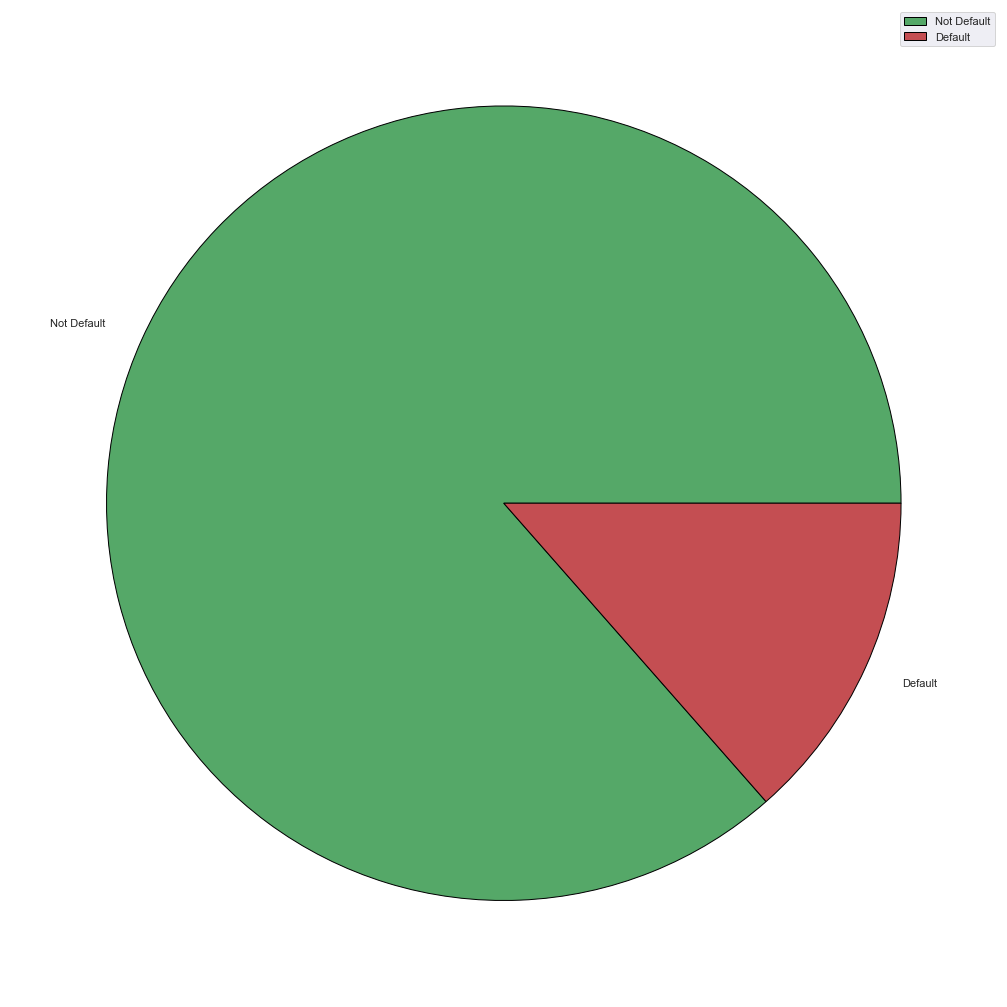

In [38]:

plt.pie(temp['status'].value_counts())
labels = ['Not Default','Default']
plt.pie(temp['status'].value_counts(),labels=labels,wedgeprops={'edgecolor':'black'})
plt.legend()

In [39]:
# temp.groupby('year')['status'].value_counts(normalize=True).pipe(sns.bar)

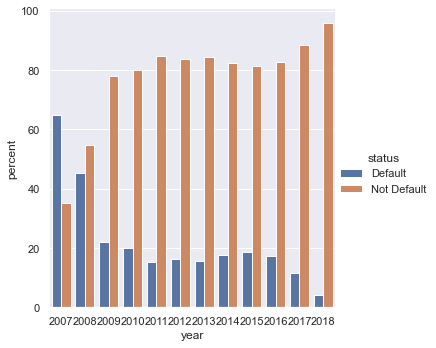

In [40]:
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

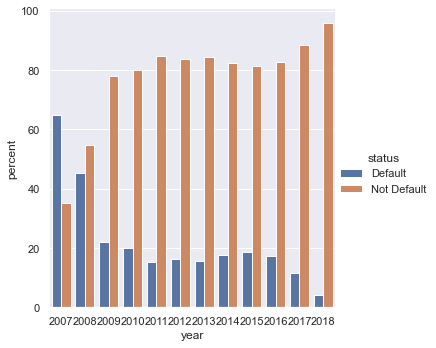

In [41]:
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

In [42]:
df.loan_status

1222456         Fully Paid
1089513            Current
1410554    In Grace Period
1216952         Fully Paid
13571           Fully Paid
                ...       
613979             Current
1883944         Fully Paid
330252          Fully Paid
1934127         Fully Paid
53469          Charged Off
Name: loan_status, Length: 1808534, dtype: object

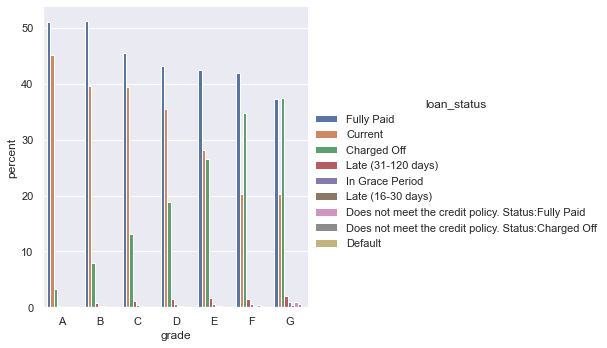

In [43]:
# check R
x,y = 'grade', 'loan_status'

df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  

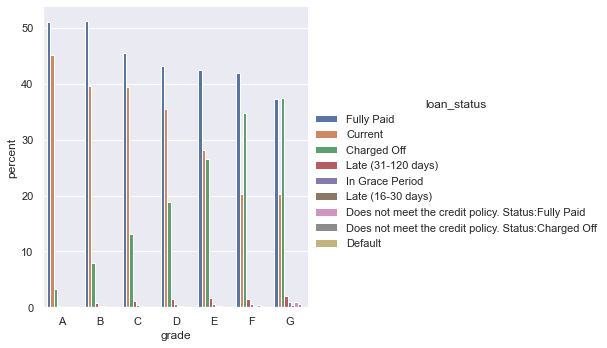

In [44]:
# # check R
x,y = 'grade', 'loan_status'
g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

In [45]:
## new

Text(0.5, 1.0, 'average interest rate for borrower among diffrent states')

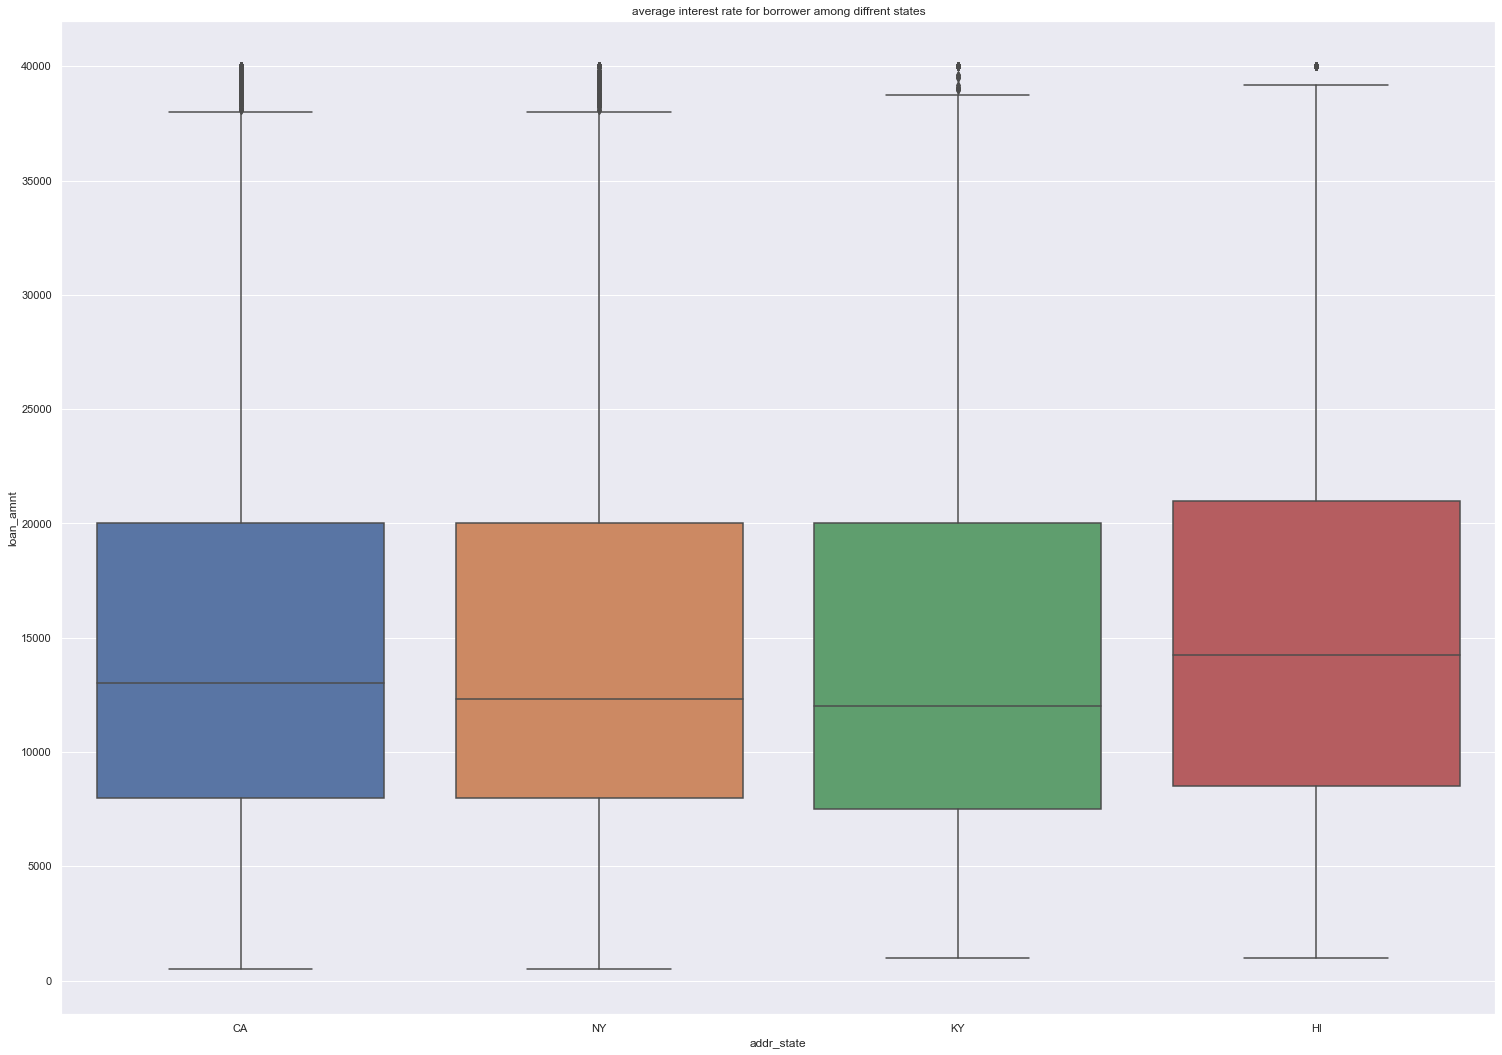

In [46]:
# comparing income in Arkansans vs income in california
temp = df[  (df.addr_state=='CA') | (df.addr_state=='NY') |( df.addr_state=='KY') |( df.addr_state=='HI')  ]
temp.head()

#temp = df[df.addr_state=='CA']
temp.head()


sns.boxplot(y='loan_amnt',x='addr_state',data=temp)#,order=temp.groupby("addr_state")['int_rate'].median().sort_values().index)
plt.title("average interest rate for borrower among diffrent states")

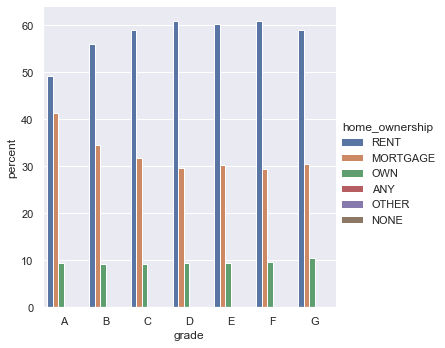

In [47]:
y,x= 'home_ownership', 'grade'
temp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  


Text(0.5, 1.0, 'different purposes with their interest rate')

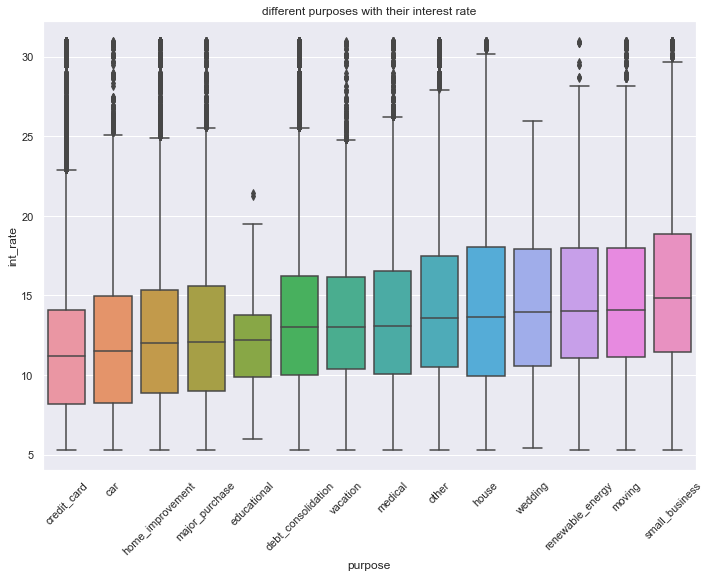

In [48]:
# 14 go there
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.boxplot(x='purpose',y='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('different purposes with their interest rate')



Text(0.5, 1.0, 'different purposes with their interest rate')

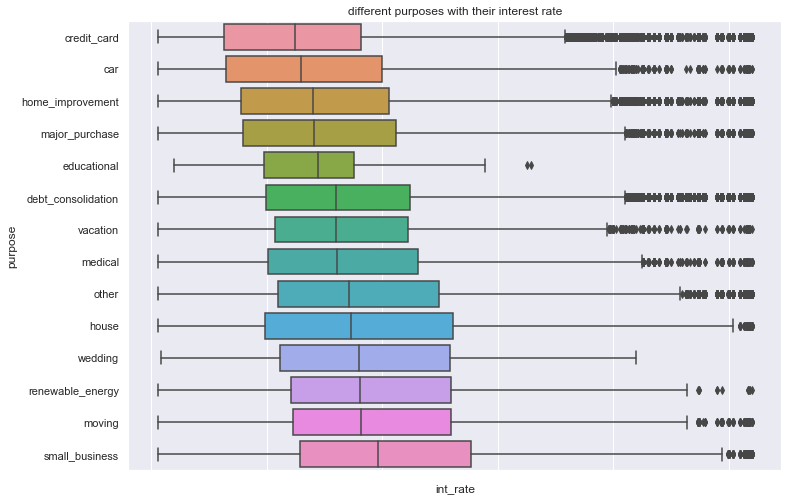

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.boxplot(y='purpose',x='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('different purposes with their interest rate')

In [106]:
# 0 charged off,defalut,'Does not meet the credit policy. Status:Charged Off', 'In Grace Period', 'Late (16-30 days)','Late (31-120 days)'
# 1 current,'Does not meet the credit policy. Status:Fully Paid','Fully Paid',
L = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','In Grace Period','Late (16-30 days)','Late (31-120 days)']
temp = df[['grade','loan_status','year']]
temp['status'] = temp.loan_status.apply(lambda x:'Bad standing' if x in L  else 'Good Standing' )
#temp = df[ (df.loan_status==L[0]) | (df.loan_status==L[1]) | (df.loan_status==L[2]) | (df.loan_status==L[3]) | (df.loan_status==L[4]) | (df.loan_status==L[5])]
temp.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,grade,loan_status,year,status
0,C,Fully Paid,2015,Good Standing
1,C,Fully Paid,2015,Good Standing
2,B,Fully Paid,2015,Good Standing
4,F,Fully Paid,2015,Good Standing
5,C,Fully Paid,2015,Good Standing


In [15]:
df.int_rate

0          13.99
1          11.99
2          10.78
4          22.45
5          13.44
6           9.17
7           8.49
8           6.49
9          11.48
12         12.88
13         19.48
14          6.49
15          7.49
16          7.49
17         11.99
19         19.89
20         12.88
21         14.85
22         13.44
23         13.44
24          7.49
25         14.85
26          5.32
27         17.97
28          5.32
29          5.32
30         12.88
31         24.24
32         10.78
33         13.99
35          7.49
36         13.99
37         14.85
38         11.48
39         14.85
40         15.77
41         17.97
43          9.80
44          5.32
45         13.44
46         15.77
47          9.80
49         17.27
50          9.17
54         12.88
56         18.49
57         11.99
58          9.17
59          7.91
60         13.44
61         11.99
62         18.49
63         12.88
64         12.88
65         14.85
66          8.49
68         13.99
70         13.44
71         14.

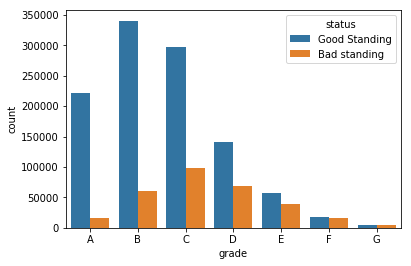

In [16]:
# default rate for each category inn our problem 
sns.countplot(x='grade',hue='status',data=temp,order=["A","B","C","D","E","F","G"])

In [17]:
sns.barplot(x='sub_grade',y='int_rate',data=temp,order=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5"])

ValueError: Could not interpret input 'sub_grade'

Text(0.5, 1.0, 'Default rate per year')

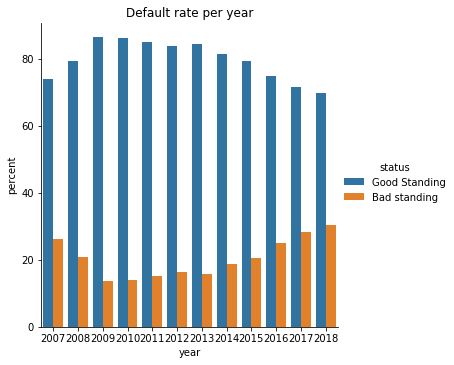

In [107]:
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

plt.title('Default rate per year')

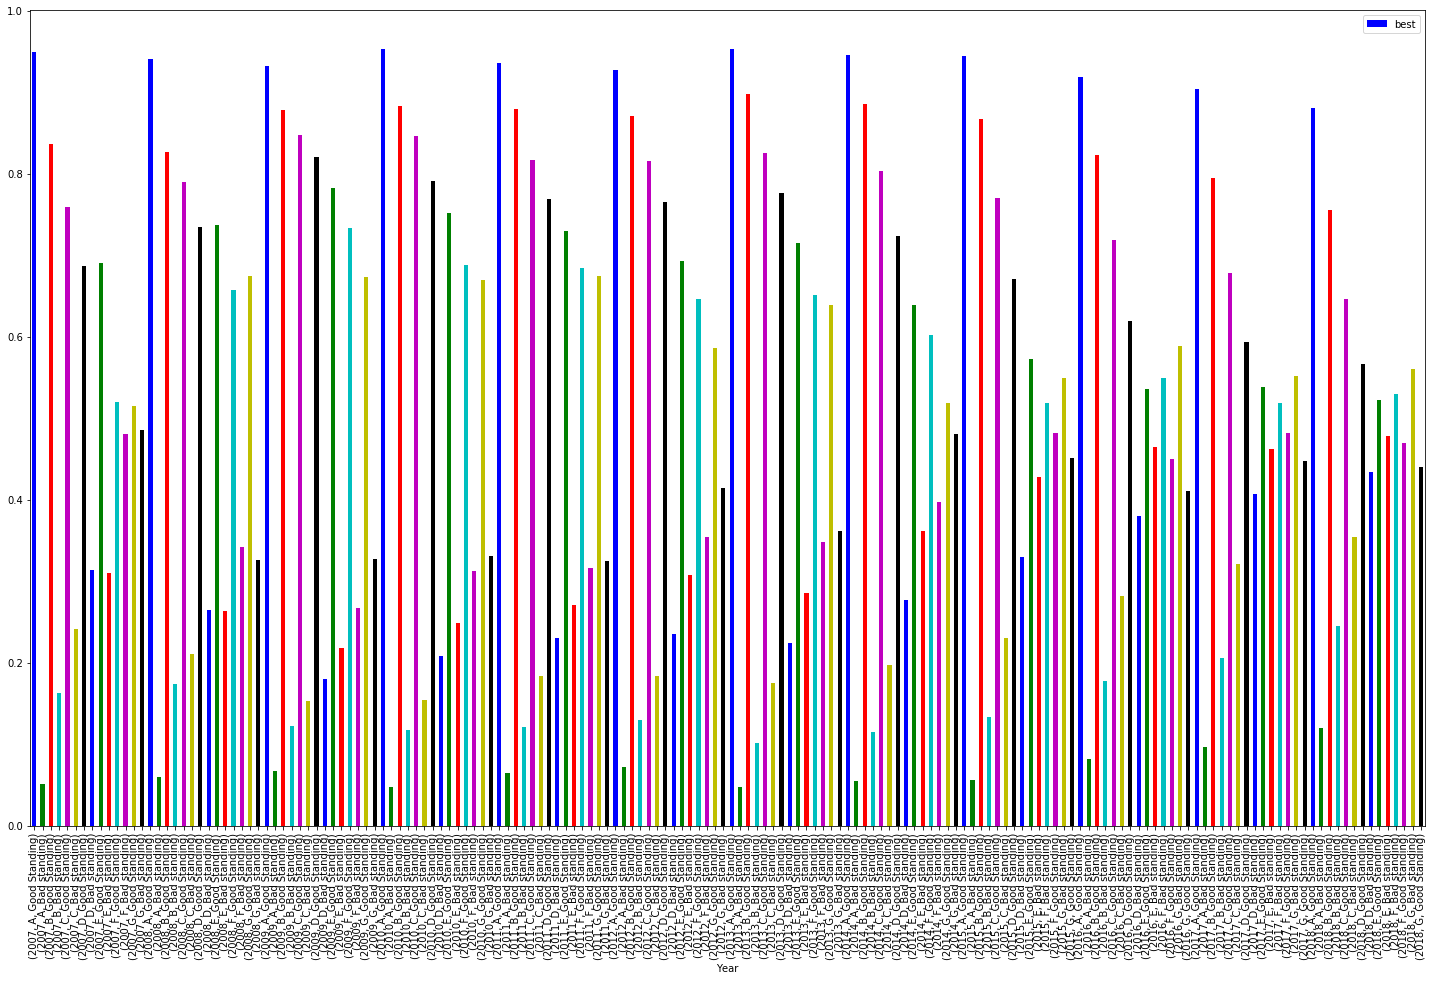

In [43]:
from pylab import rcParams
color = ['b','g','r','c','m','y','k']
#         a   b   c   d   e   f  g 
rcParams['figure.figsize'] = 25, 15
temp.groupby(['year','grade'])['status'].value_counts(normalize=True).plot(kind='bar',color=color)#,labels = ['A','B',"C","D","E","F","G"])
plt.xlabel('Year')
plt.legend(['best','worst'])

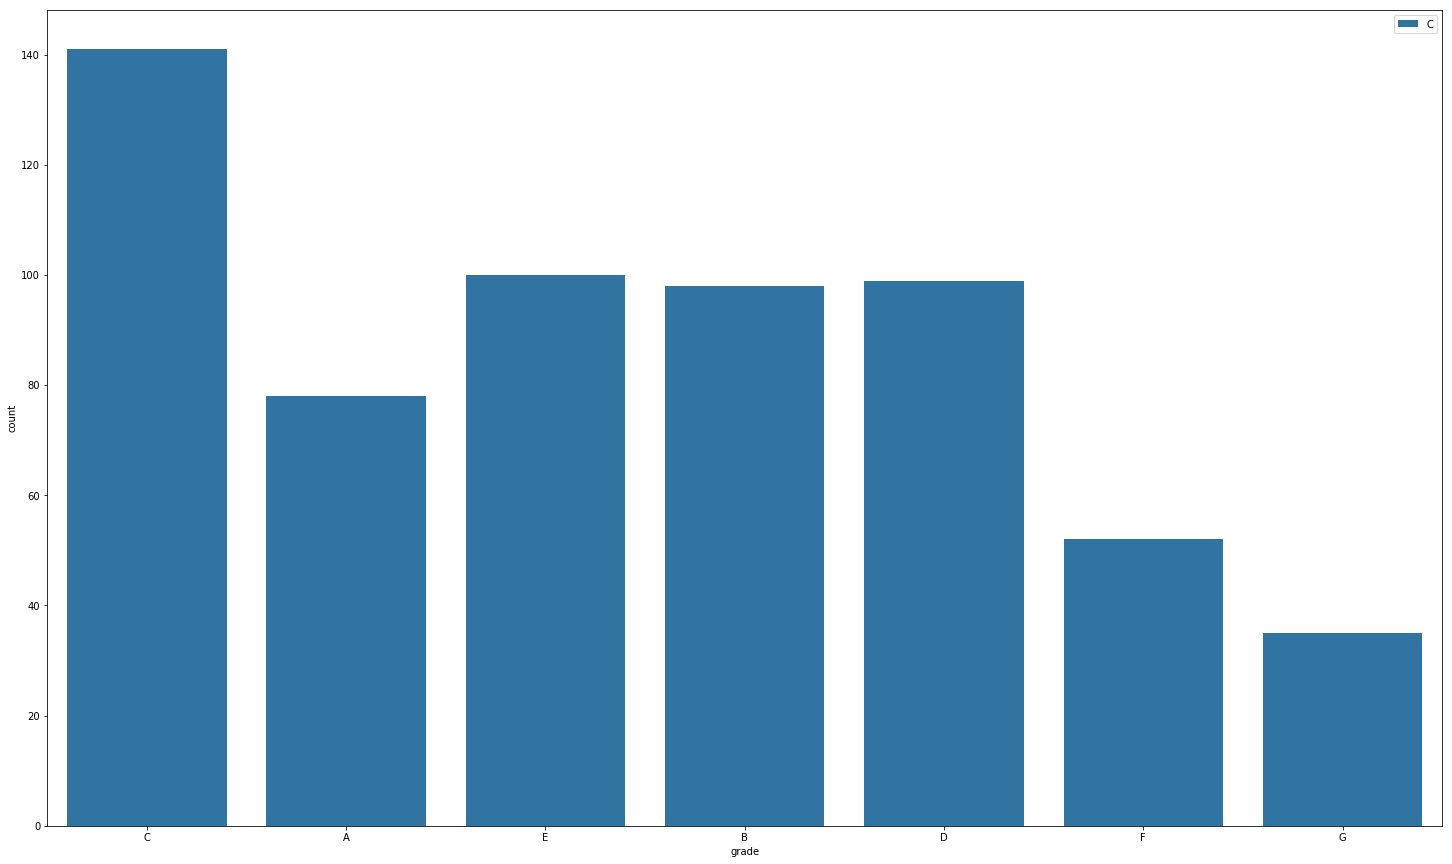

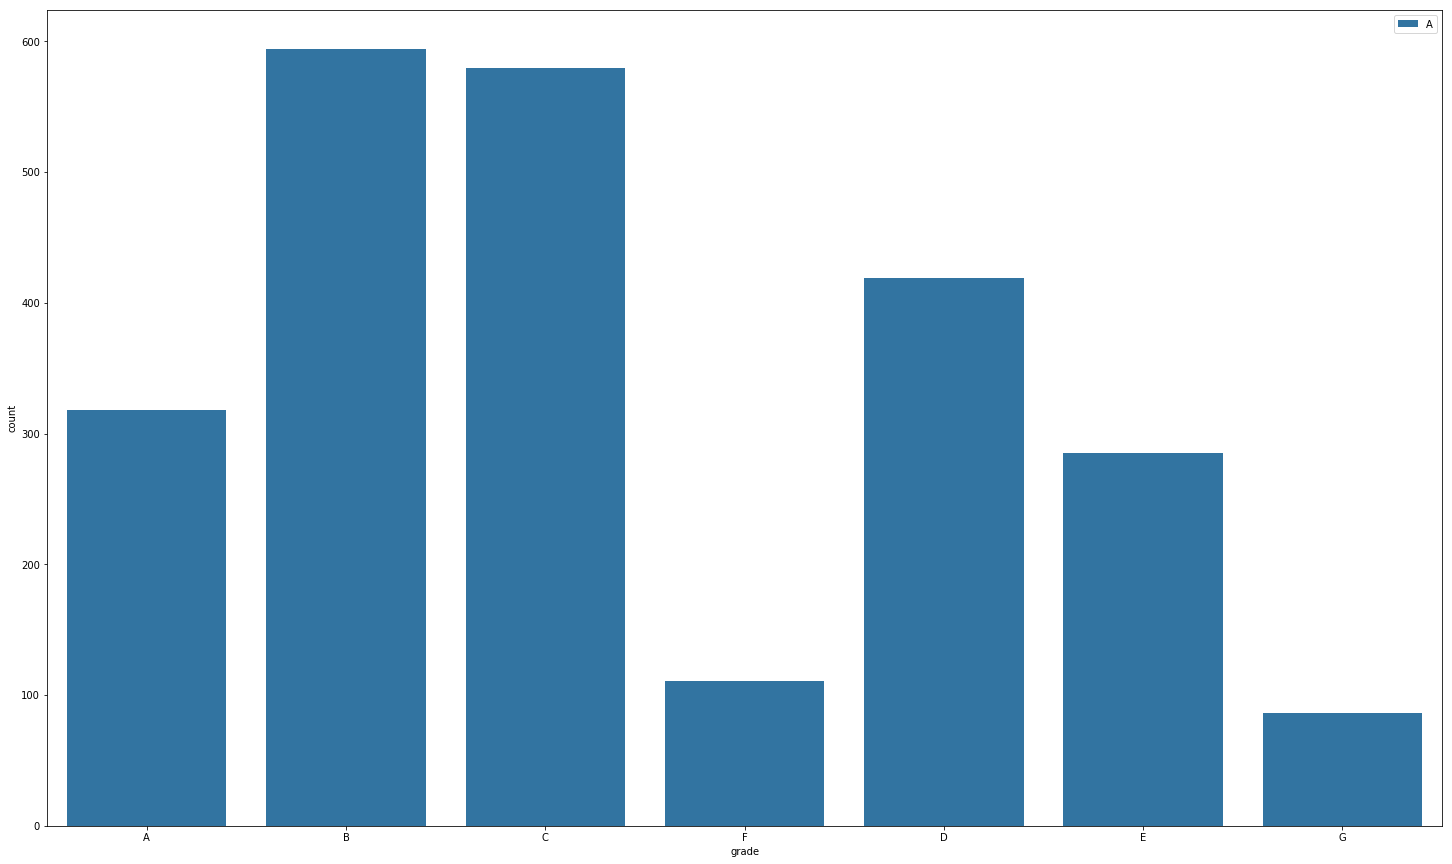

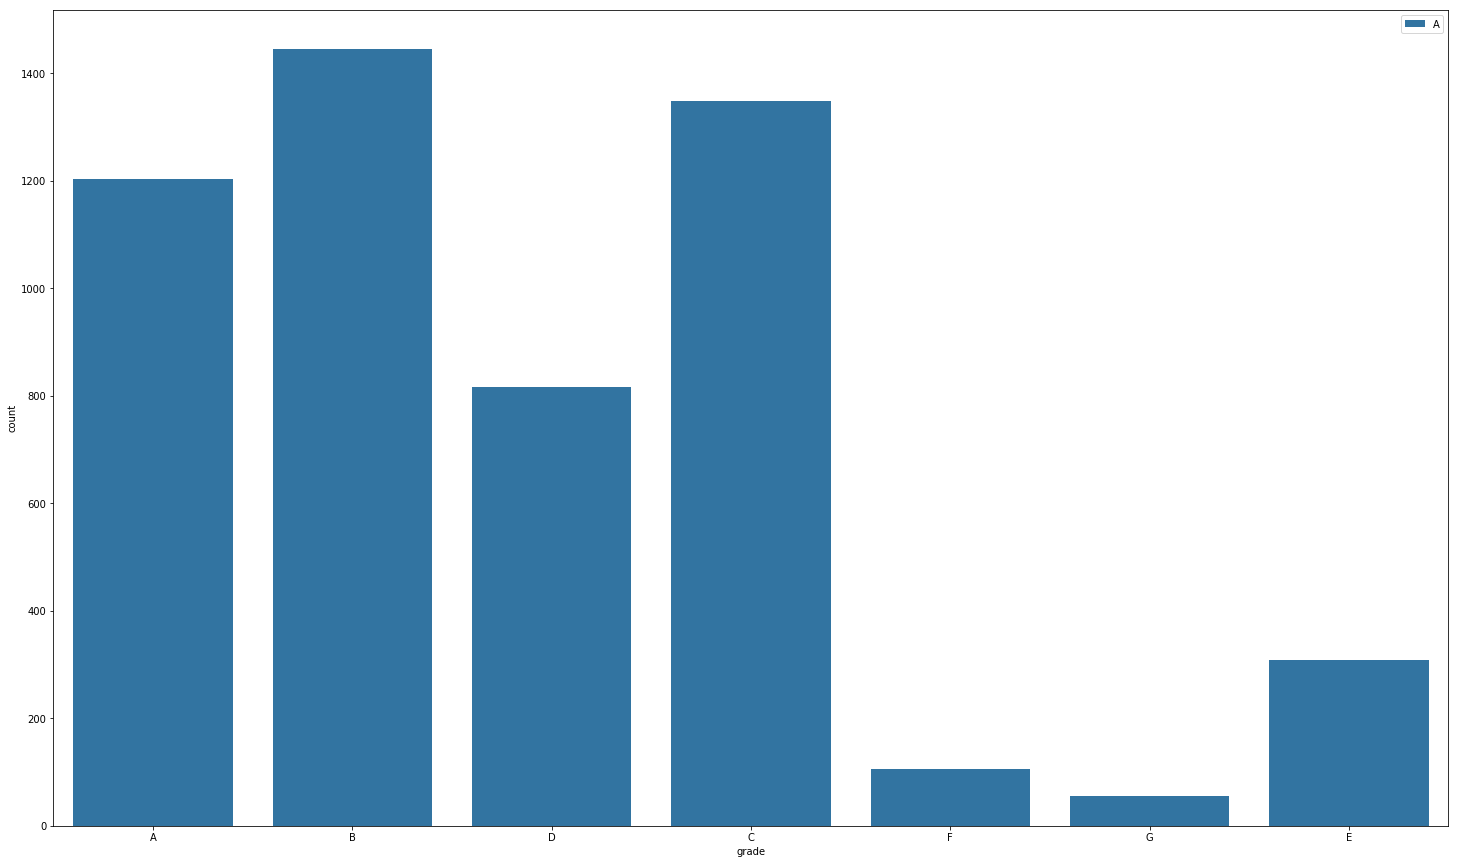

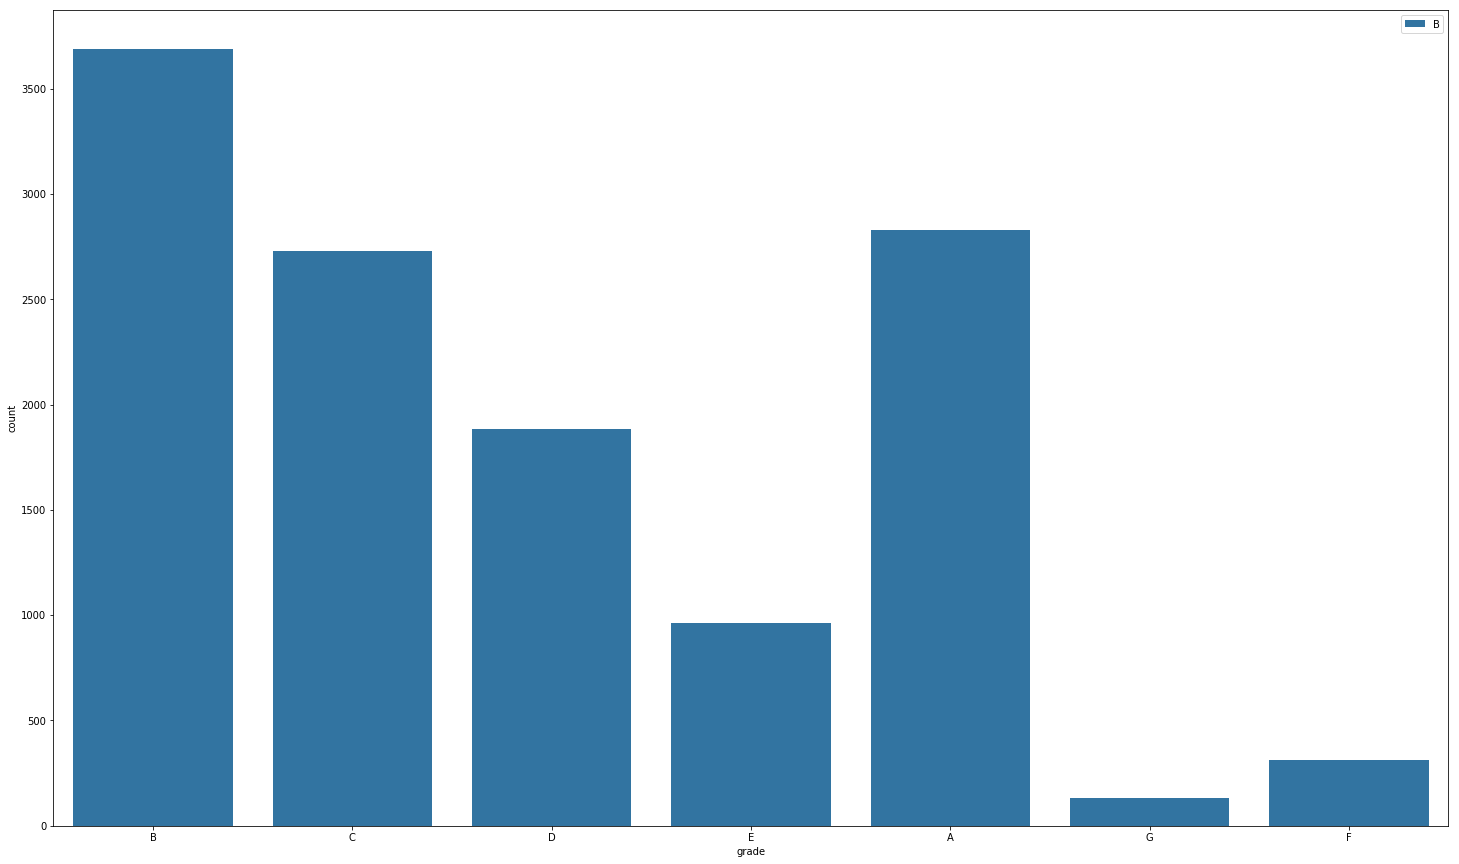

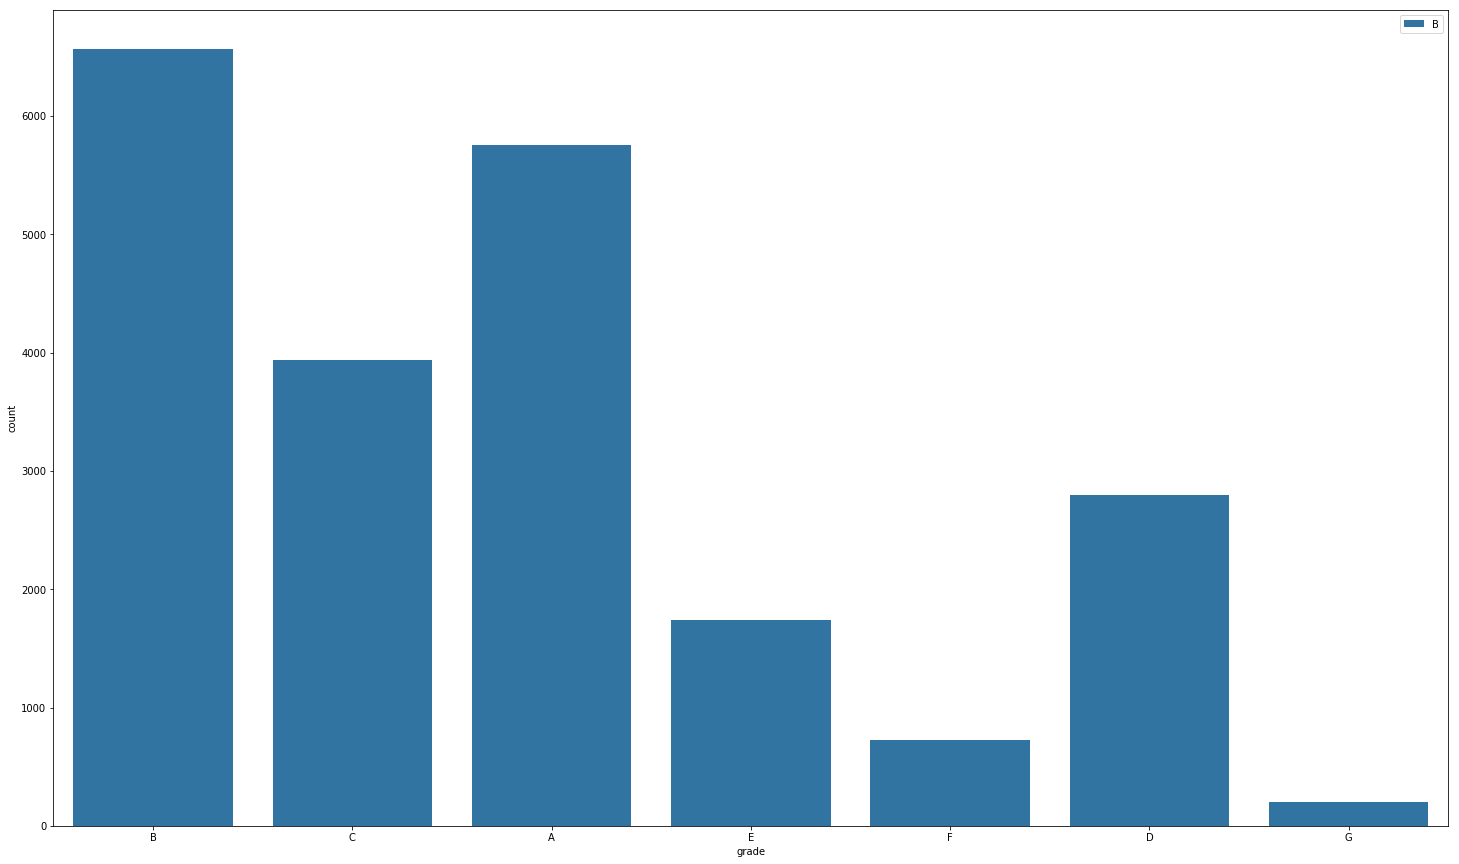

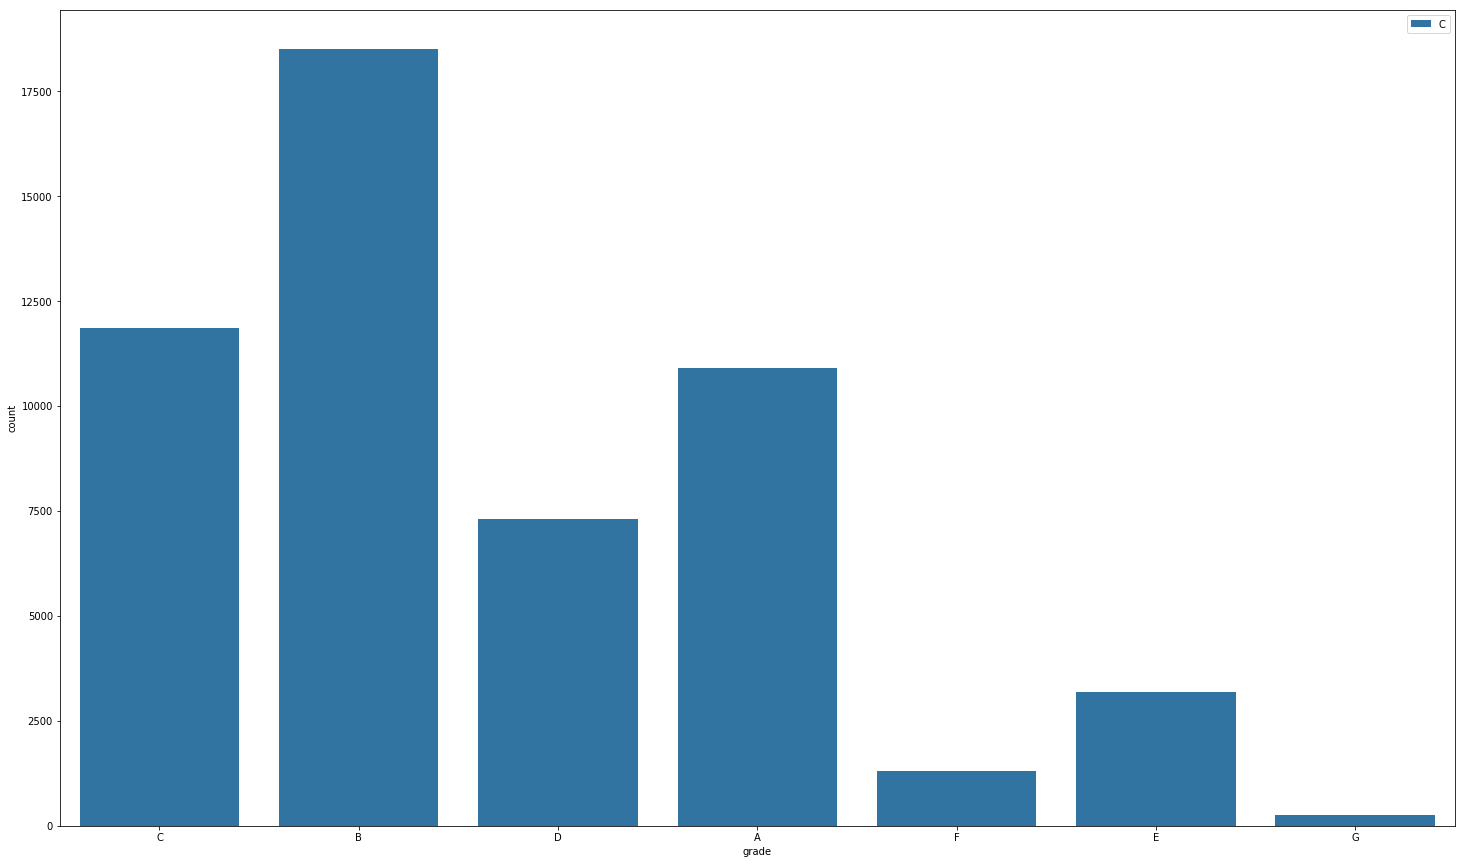

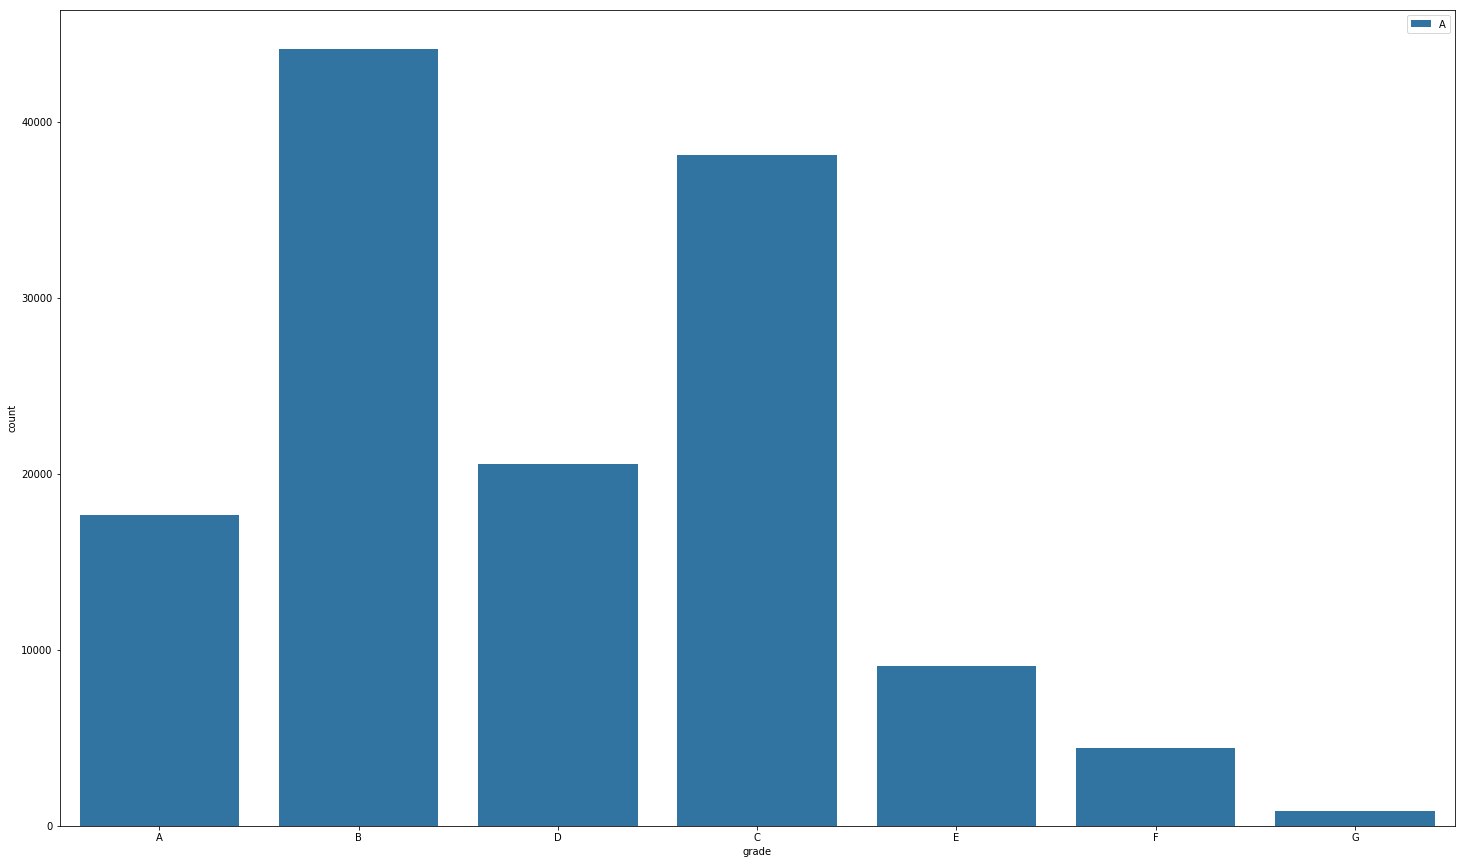

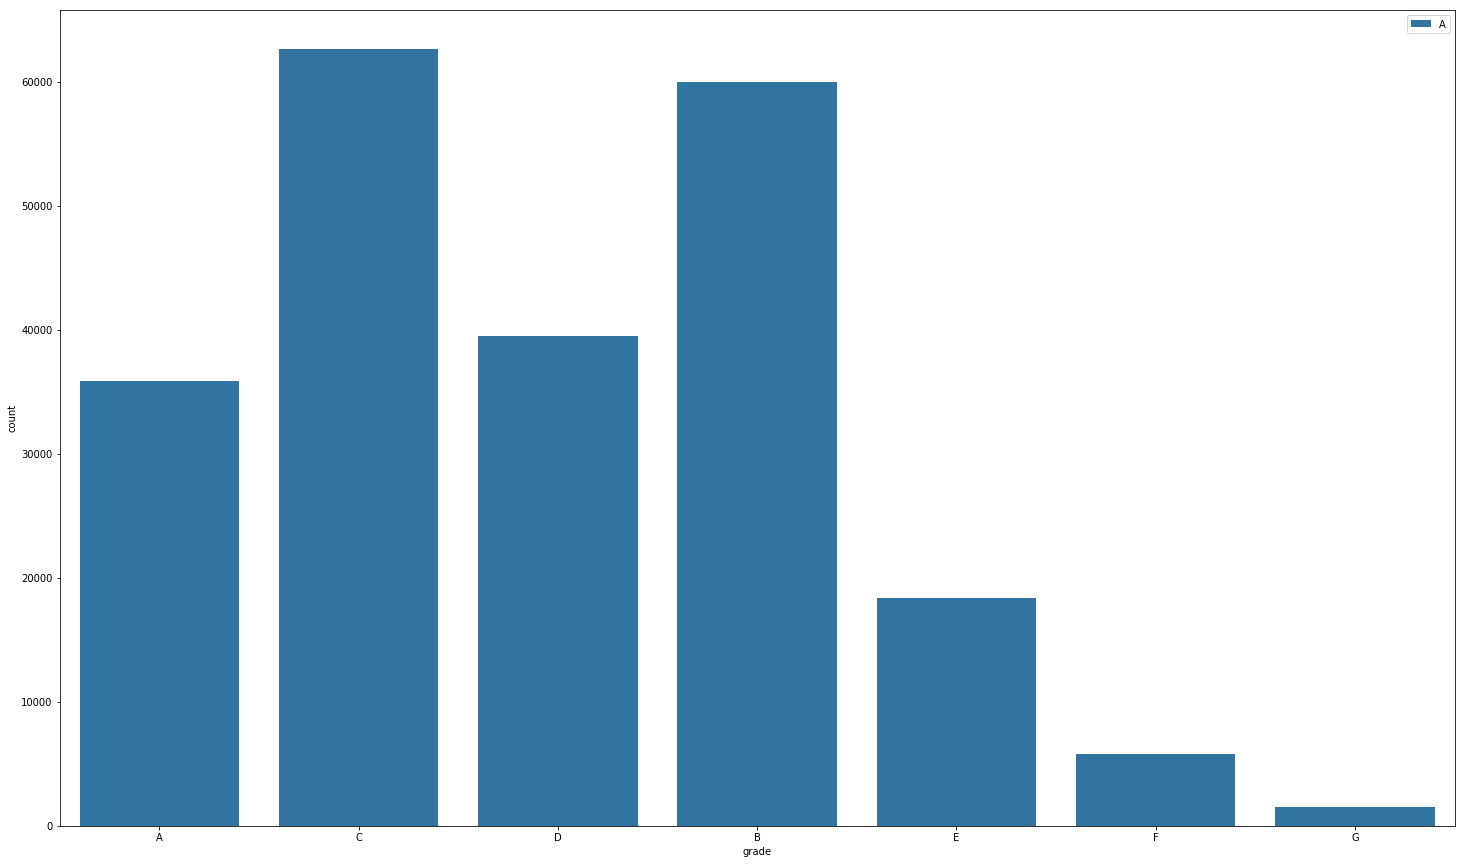

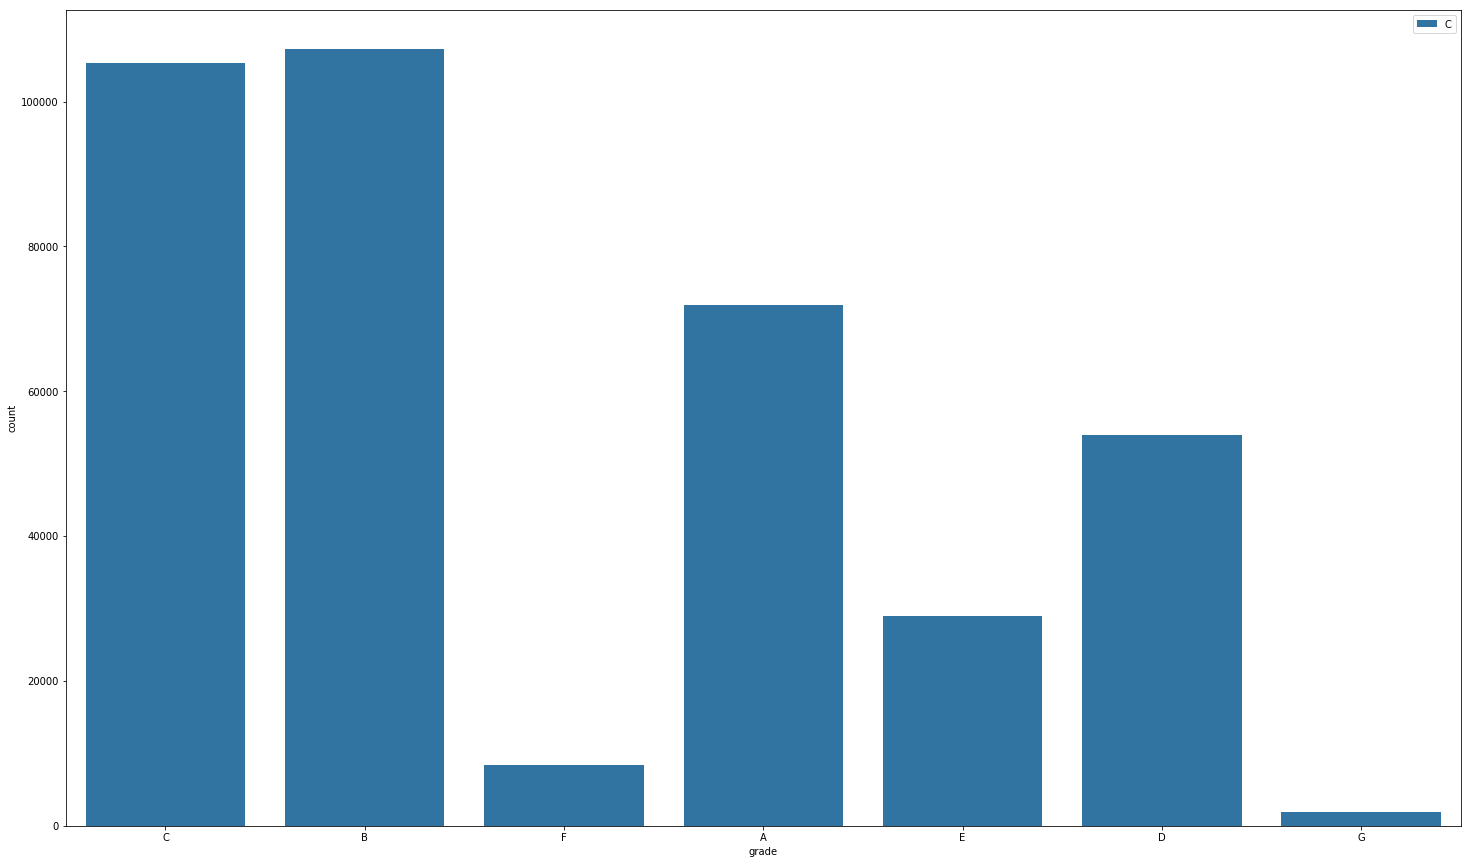

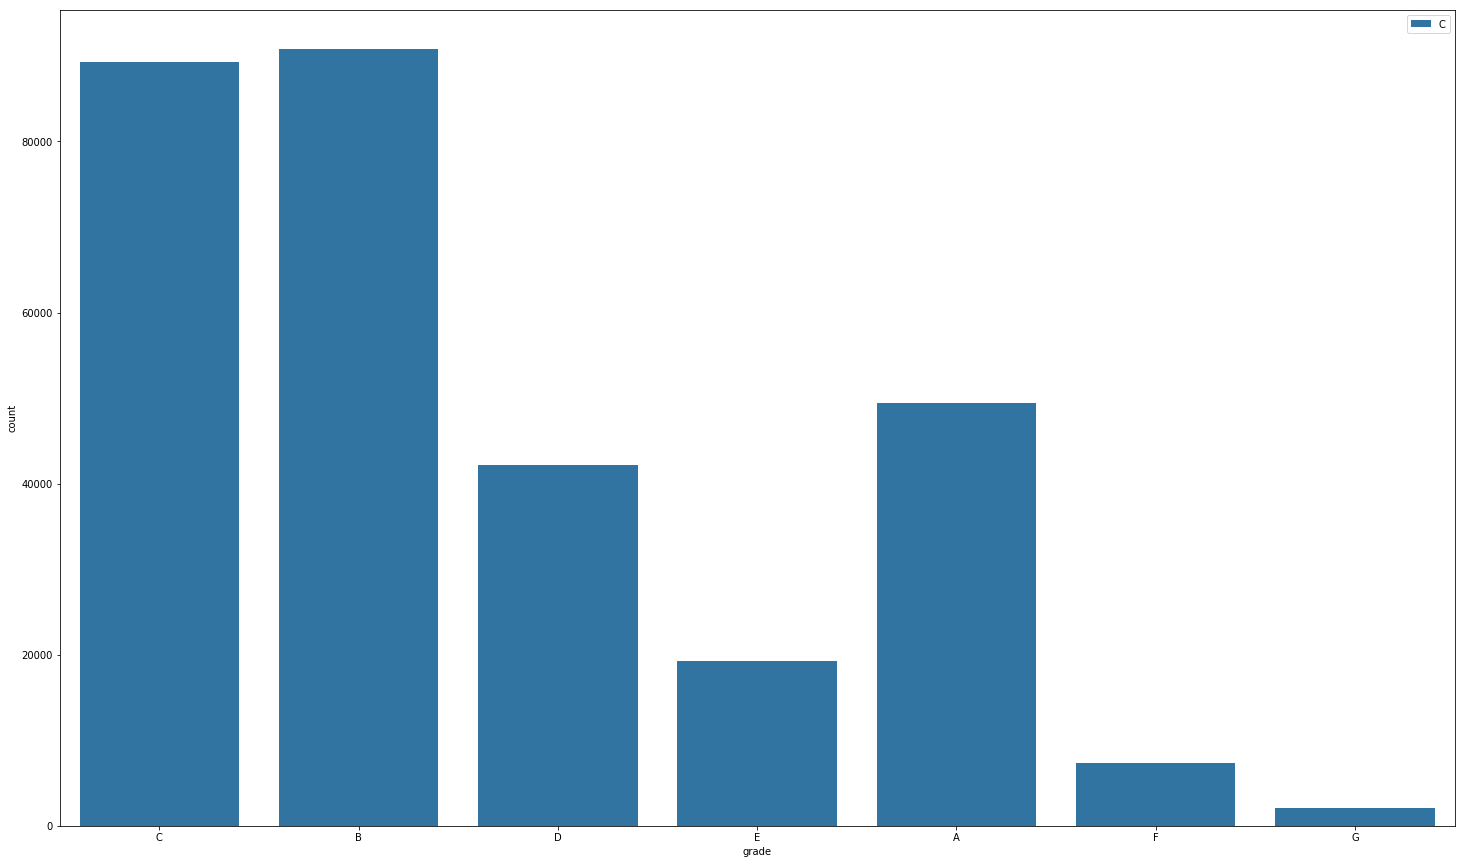

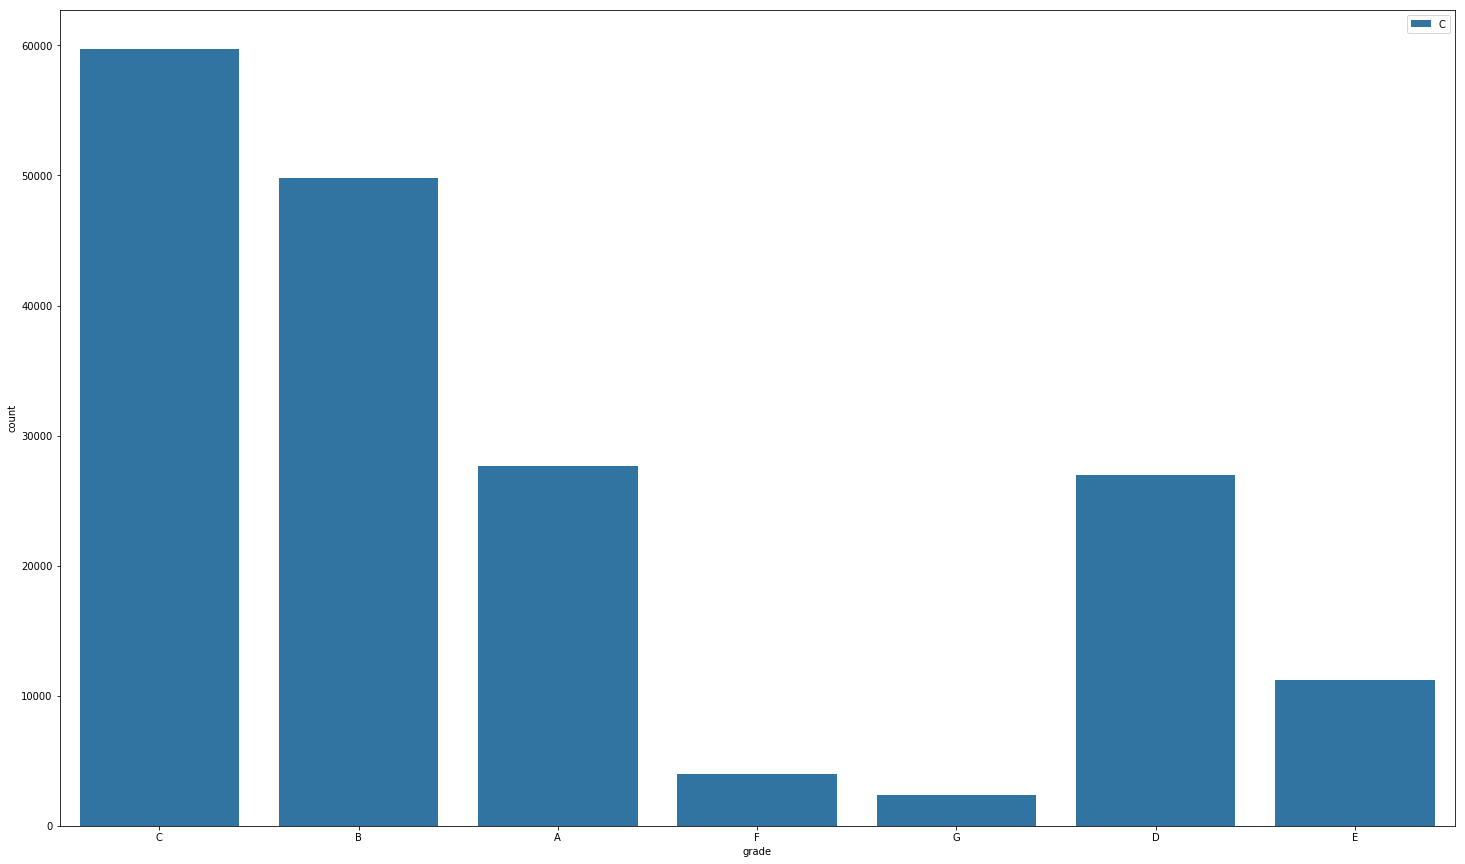

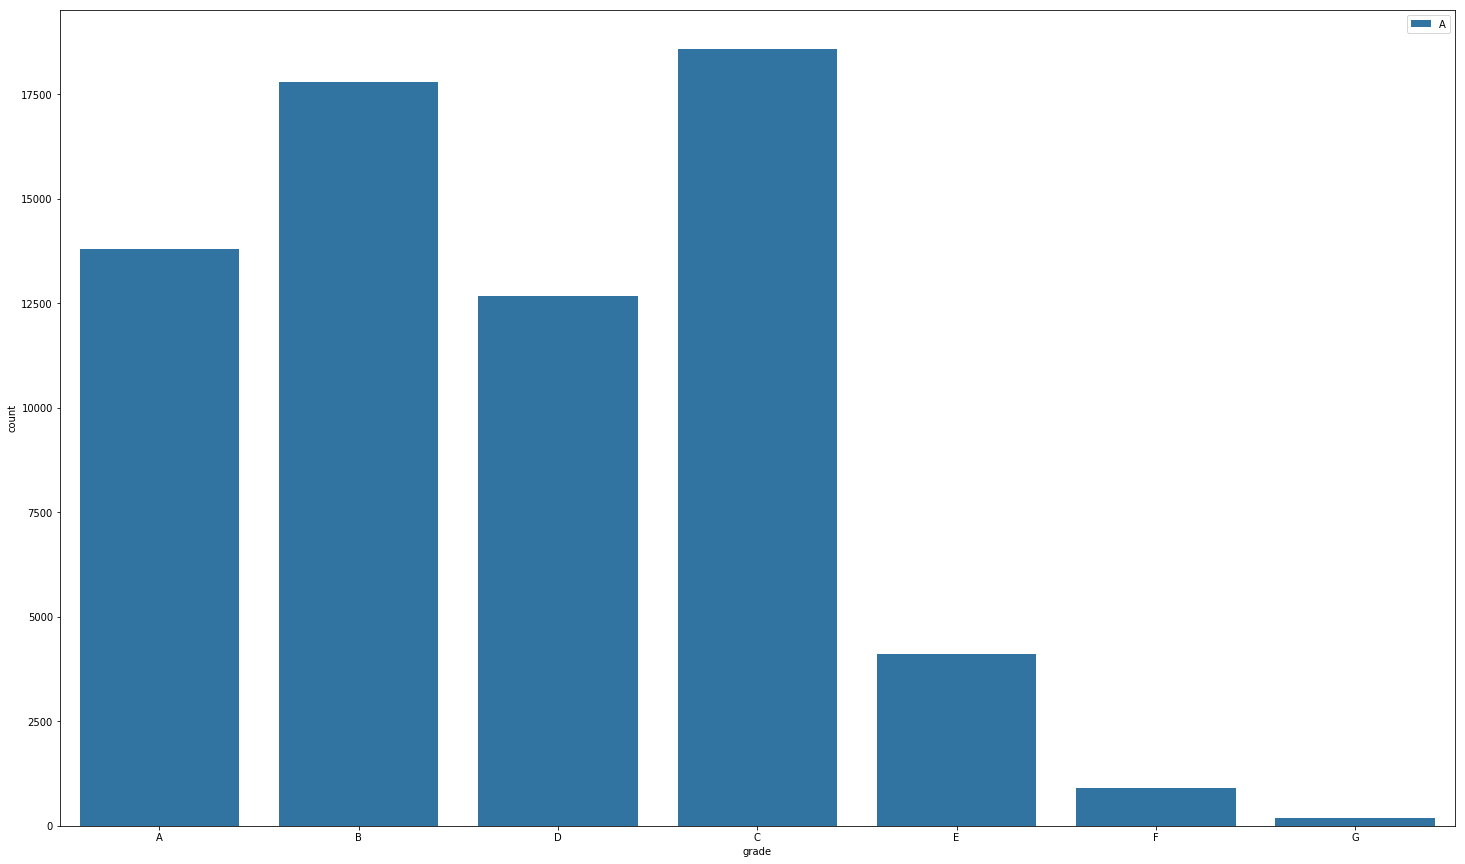

In [48]:
for i in sorted(list(set(temp.year))):
    fil = temp[(temp['year']==i)]
    sns.countplot(data=fil,x='grade',hue='year')
    #fil.groupby('grade')['status'].value_counts(normalize=True).plot(kind='bar')#,labels = ['A','B',"C","D","E","F","G"])
    plt.legend(fil.grade)
    plt.show()
#plt.xlabel('Year')
#plt.legend(['best','worst'])

In [45]:
sorted(list(set(temp.year)))

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

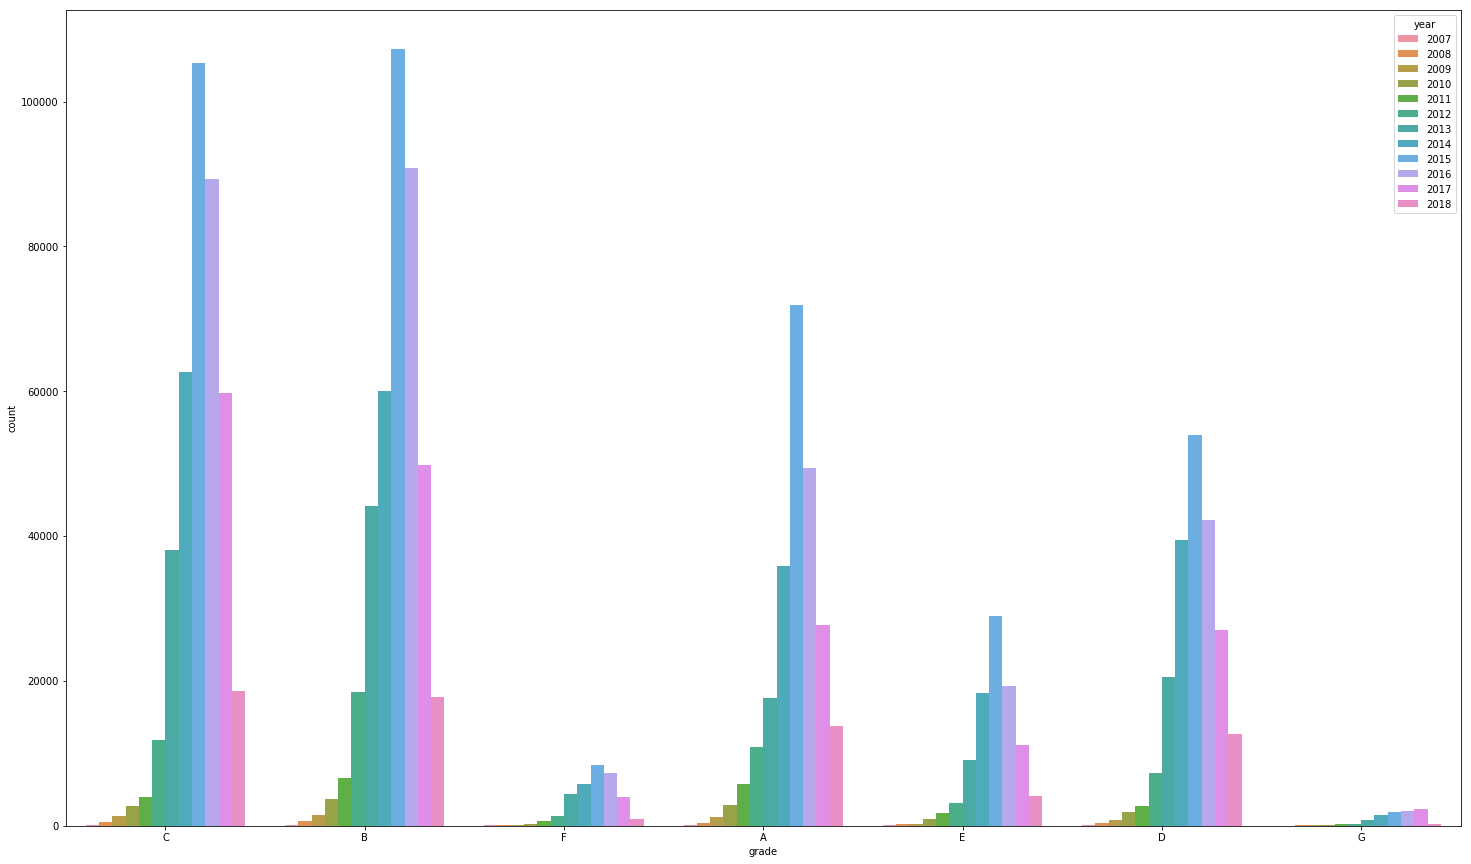

In [50]:
sns.countplot(data=temp,x='grade',hue='year')

In [51]:
temp

,grade,loan_status,year,status
0,C,Fully Paid,2015,Good Standing
1,C,Fully Paid,2015,Good Standing
2,B,Fully Paid,2015,Good Standing
4,F,Fully Paid,2015,Good Standing
5,C,Fully Paid,2015,Good Standing
6,B,Fully Paid,2015,Good Standing
7,B,Fully Paid,2015,Good Standing
8,A,Fully Paid,2015,Good Standing
9,B,Fully Paid,2015,Good Standing
12,C,Fully Paid,2015,Good Standing


In [108]:

temp = df[["issue_d","last_pymnt_d","term","loan_amnt","loan_status","int_rate",'grade',"installment","total_rec_prncp","total_rec_int","year"]]
temp.head()

,issue_d,last_pymnt_d,term,loan_amnt,loan_status,int_rate,grade,installment,total_rec_prncp,total_rec_int,year
0,Dec-2015,Jan-2019,36 months,3600.0,Fully Paid,13.99,C,123.03,3600.0,821.72,2015
1,Dec-2015,Jun-2016,36 months,24700.0,Fully Paid,11.99,C,820.28,24700.0,979.66,2015
2,Dec-2015,Jun-2017,60 months,20000.0,Fully Paid,10.78,B,432.66,20000.0,2705.92,2015
4,Dec-2015,Jul-2016,60 months,10400.0,Fully Paid,22.45,F,289.91,10400.0,1340.50,2015
5,Dec-2015,May-2017,36 months,11950.0,Fully Paid,13.44,C,405.18,11950.0,1758.95,2015


In [109]:
temp['return'] = ((temp.total_rec_prncp + temp.total_rec_int)/temp.loan_amnt)-1
temp.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,issue_d,last_pymnt_d,term,loan_amnt,loan_status,int_rate,grade,installment,total_rec_prncp,total_rec_int,year,return
0,Dec-2015,Jan-2019,36 months,3600.0,Fully Paid,13.99,C,123.03,3600.0,821.72,2015,0.228256
1,Dec-2015,Jun-2016,36 months,24700.0,Fully Paid,11.99,C,820.28,24700.0,979.66,2015,0.039662
2,Dec-2015,Jun-2017,60 months,20000.0,Fully Paid,10.78,B,432.66,20000.0,2705.92,2015,0.135296
4,Dec-2015,Jul-2016,60 months,10400.0,Fully Paid,22.45,F,289.91,10400.0,1340.50,2015,0.128894
5,Dec-2015,May-2017,36 months,11950.0,Fully Paid,13.44,C,405.18,11950.0,1758.95,2015,0.147192


Text(0.5, 1.0, 'Average return by year')

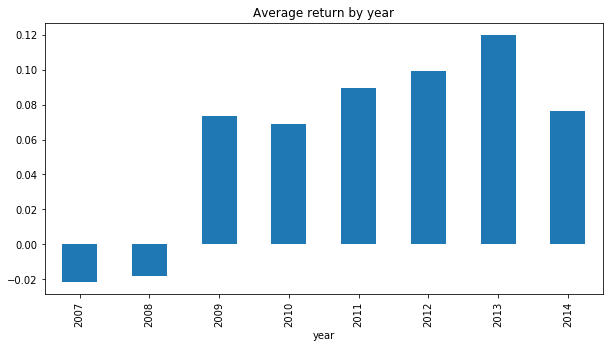

In [110]:
rcParams['figure.figsize'] = 10, 5
temp.groupby('year')['return'].agg('mean').iloc[:8].plot(kind='bar')
plt.title('Average return by year')

In [81]:
temp.groupby('grade')['return'].agg('mean')#.plot(kind='bar')
#plt.title('Average return by year')

grade
A    0.042798
B    0.034789
C    0.000194
D   -0.027220
E   -0.052897
F   -0.079429
G   -0.140334
Name: return, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

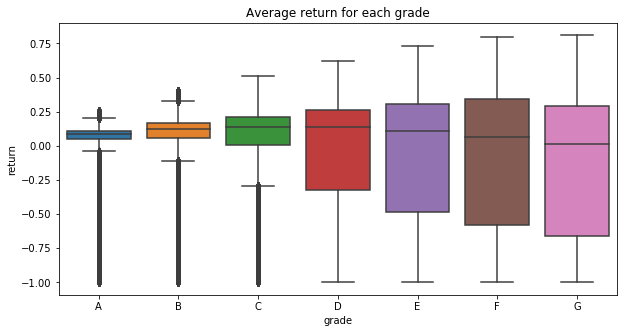

In [115]:
#temp.groupby('grade')['return'].agg(['median']).plot(kind='bar')
sns.boxplot(x='grade',y='return',data=temp,order=["A","B","C","D","E","F","G"])
plt.title('Average return for each grade')
plt.xticks(rotation=0)

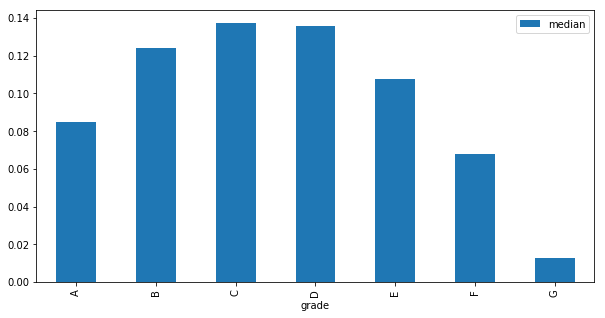

In [116]:
temp.groupby('grade')['return'].agg(['median']).plot(kind='bar')

In [98]:
dd =temp.groupby('grade')['return'].agg(['median','mean'])
print(dd.head())
#dd['return_by_grade'] = (dd.iloc[:,0] + dd.iloc[:,1])/2


         median      mean
grade                    
A      0.084861  0.042798
B      0.123883  0.034789
C      0.137168  0.000194
D      0.135909 -0.027220
E      0.107724 -0.052897


In [99]:
dd

,median,mean,return_by_grade
grade,,,
A,0.084861,0.042798,0.063829
B,0.123883,0.034789,0.079336
C,0.137168,0.000194,0.068681
D,0.135909,-0.027220,0.054345
E,0.107724,-0.052897,0.027414
F,0.067760,-0.079429,-0.005834
G,0.012911,-0.140334,-0.063712


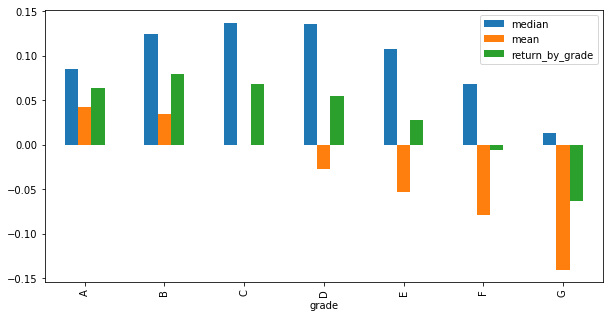

In [100]:
dd.plot(kind='bar')